<a href="https://colab.research.google.com/github/ricevutoriccardo/Thesis-MML/blob/main/Thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DEFAULT CREDIT CARD DATASET

Objective of our project is to predict which customer might default in upcoming months. 

What is Credit Card Default?

A credit card is type of payment card in which charges are made against a line of credit instead of the account holder's cash deposits. When someone uses a credit card to make a purchase, that person's account accrues a balance that must be paid off each month.

Credit card default happens when you can't cover your credit card payments. Missing credit card payments once or twice does not count as a default. A payment default occurs when you fail to pay the Minimum Amount Due on the credit card for a few consecutive months.

In [ ]:
#libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import csv 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# PCA
from sklearn.decomposition import PCA
import plotly.express as px

# Resampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.combine import SMOTEENN
from sklearn.utils import resample

# Model
from sklearn.feature_selection import RFE,SelectFromModel
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.pipeline import Pipeline 
from sklearn.naive_bayes import GaussianNB
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score, roc_curve, accuracy_score, recall_score, precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import plotly.figure_factory as ff
from sklearn.svm import SVC

sns.set_theme(style="whitegrid")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
''' prima riga se la usa marco, seconda riccardo'''
#dataset = pd.read_csv("/content/drive/MyDrive/Polito/Magistrale/MML/Project_MML/defaultofcreditcardclients.csv", sep=';', index_col=0)
dataset = pd.read_csv("/content/drive/MyDrive/MML/defaultofcreditcardclients.csv", sep=';', index_col=0)

## **Dataset Description**


There are 25 variables:

*   **ID:** ID of each client
*   **LIMIT_BAL:** Amount of given credit in NT dollars (includes individual and family/supplementary credit)
* **SEX:** Gender (1=male, 2=female)
* **EDUCATION:** (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* **MARRIAGE:** Marital status (1=married, 2=single, 3=others)
* **AGE:** Age in years
* **PAY_0-6:** Repayment status from September (0) to April (6), 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
* **BILL_AMT1-6:** Amount of bill statement in September (1) to April (6), 2005 (NT dollar)
* **PAY_AMT1-6:** Amount of previous payment from September (1) to April (6), 2005 (NT dollar)

* **default.payment.next.month:** Default payment (1=yes, 0=no)

In [ ]:
df = dataset.copy()
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


### Data Wrangling

In this phase we do the process of data cleaning to have a better format and handle missing values in a proper way

In [ ]:
#@title
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

From the above output we can observe that there are no missing values inside the dataset

In [ ]:
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

Above a double check on the lack of missing values

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


On the dataset description the PAY_0 is not indicated. We rename it in PAY_1 (missing) in order to match in the repayment status of September.

Also, replace the name of column 'default payment next month' with 'default' for a better understanding.

In [ ]:
df.rename(columns={'PAY_0':'PAY_1'}, inplace=True)
df.rename(columns={'default payment next month':'default'}, inplace=True)

df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


### Target (Default)

In [ ]:
df['default'].value_counts()

0    23364
1     6636
Name: default, dtype: int64

As we can see, the dataset is imbalanced. 78% of 'non default'. We have to use resampling to balance our data.

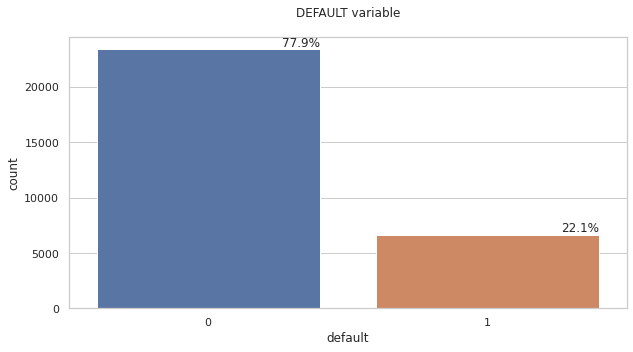

In [ ]:
plt.figure(figsize=(10,5))
plt.title('DEFAULT variable',pad=20)
ax = sns.countplot(x = 'default', data = df)

total = float(len(df))
# add annotations
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df.default))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='right', va='bottom')
plt.show()

### Categorical variables 

We had three categorical variables:
* Sex
* Marriage
* Education





#### Sex

In [ ]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

We replace value '1' with 'MALE' and value '2' with 'FEMALE'

In [ ]:
df.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}}, inplace = True)
df['SEX'].value_counts()

FEMALE    18112
MALE      11888
Name: SEX, dtype: int64

The number of women is greater than men

<Figure size 720x360 with 0 Axes>

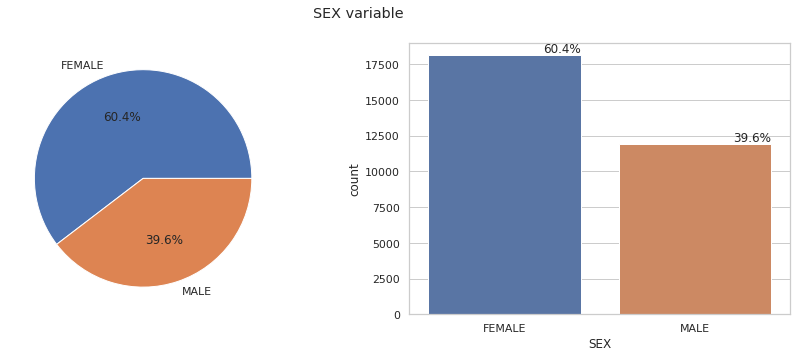

In [ ]:
plt.figure(figsize=(10,5))
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
fig.suptitle('SEX variable')
total = len(df.SEX)
plt.subplot(121)
df.SEX.value_counts().plot(kind="pie",subplots=True,autopct='%1.1f%%', ylabel='')

plt.subplot(122)
ax = sns.countplot(x = 'SEX', data = df, label='')

total = float(len(df))
# add annotations
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='right', va='bottom')
plt.show()

#### Education

In [ ]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

From the description of our dataset for the 'EDUCATIONS' variable, we can have as labels: 

1.   'graduate school' 
2.   'university'
3.   'high school'
4.   'others'

but we can see that we have also 5, 6 and 0. 
So we can add up them in the 4 label, that corresponds to *'others'*



In [ ]:
fil = (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 0)
df.loc[fil, 'EDUCATION'] = 4
df.replace({'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}}, inplace = True)
df['EDUCATION'].value_counts()

university         14030
graduate school    10585
high school         4917
others               468
Name: EDUCATION, dtype: int64

<Figure size 720x360 with 0 Axes>

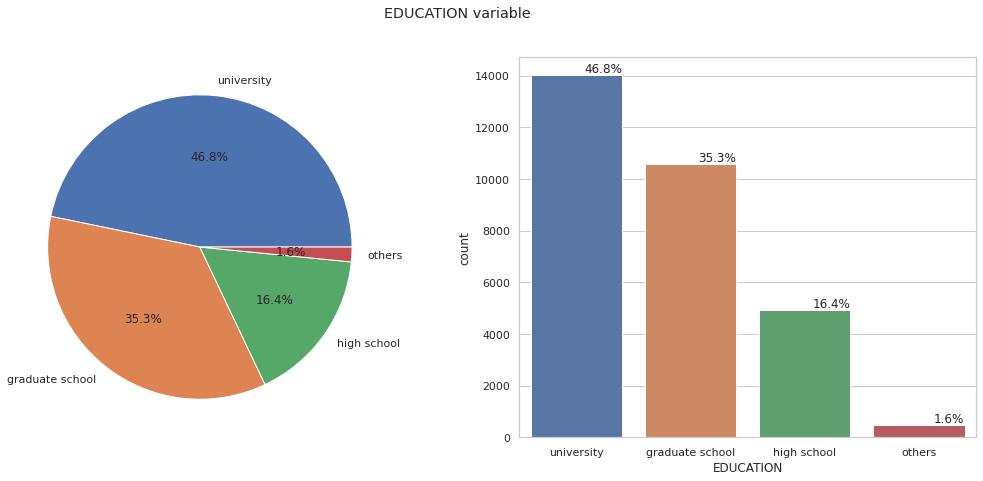

In [ ]:
plt.figure(figsize=(10,5))
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(18,7))
fig.suptitle('EDUCATION variable')
total = len(df.EDUCATION)
plt.subplot(121)
df.EDUCATION.value_counts().plot(kind="pie",subplots=True,autopct='%1.1f%%', ylabel='')

plt.subplot(122)
ax = sns.countplot(x = 'EDUCATION', data = df, label='')

total = float(len(df))
# add annotations
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='right', va='bottom')
plt.show()



#### Marriage

From dataset description we have 3 labels for 'marriage' attribute:


1.   'married' 
2.   'single'
3.   'others'




In [ ]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

Like 'educations', for 'marriage' variables we have unknown label (0), so we can add up them in the 3 label, that corresponds to *'others'*


In [ ]:
fil = df['MARRIAGE'] == 0
df.loc[fil, 'MARRIAGE'] = 3
df.replace({'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)
df['MARRIAGE'].value_counts()

single     15964
married    13659
others       377
Name: MARRIAGE, dtype: int64

We can see that there are much more 'Single' than 'Married' or 'Others' on our
dataset

<Figure size 720x360 with 0 Axes>

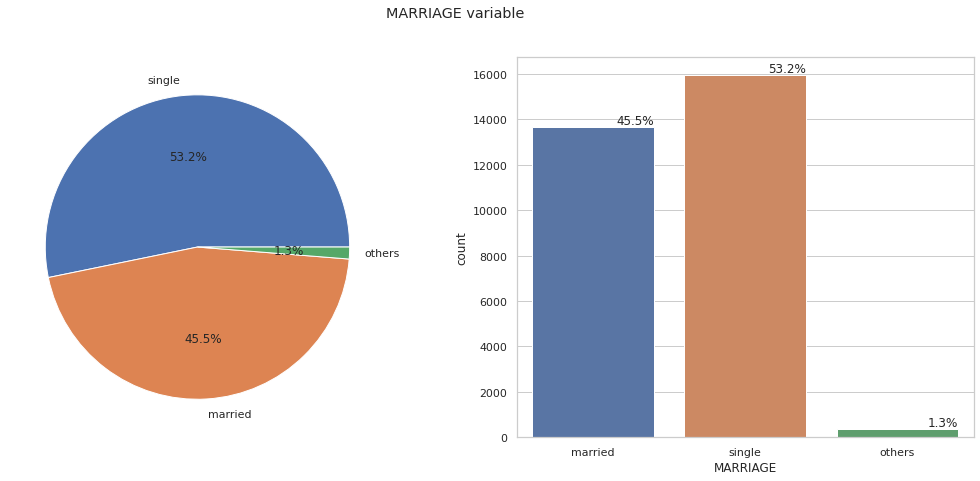

In [ ]:
plt.figure(figsize=(10,5))
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(18,7))
fig.suptitle('MARRIAGE variable')
total = len(df.MARRIAGE)
plt.subplot(121)
df.MARRIAGE.value_counts().plot(kind="pie",subplots=True,autopct='%1.1f%%', ylabel='')

plt.subplot(122)
ax = sns.countplot(x = 'MARRIAGE', data = df, label='')

total = float(len(df))
# add annotations
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='right', va='bottom')
plt.show()

In [ ]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']
df_cat = df[categorical_features]
df_cat['Defaulter'] = df['default']

From the figure that represents the correlation between the categorical variables and the target, we can see that even though women are in the majority, men are more likely to default (24% vs 21%). Continuing, we can see how a married default is more likely than a single one, even if there are more singles present. For 'education' the most demonstrative is 'university' with 24% of default.

In [ ]:
def barPerc(df,xVar,ax):
    '''
    barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable 
        ax: Axes object (for Seaborn Countplot/Bar plot or
                         pandas bar plot)
    '''
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df[xVar].unique() if x==x])

    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")

<Figure size 7200x360 with 0 Axes>

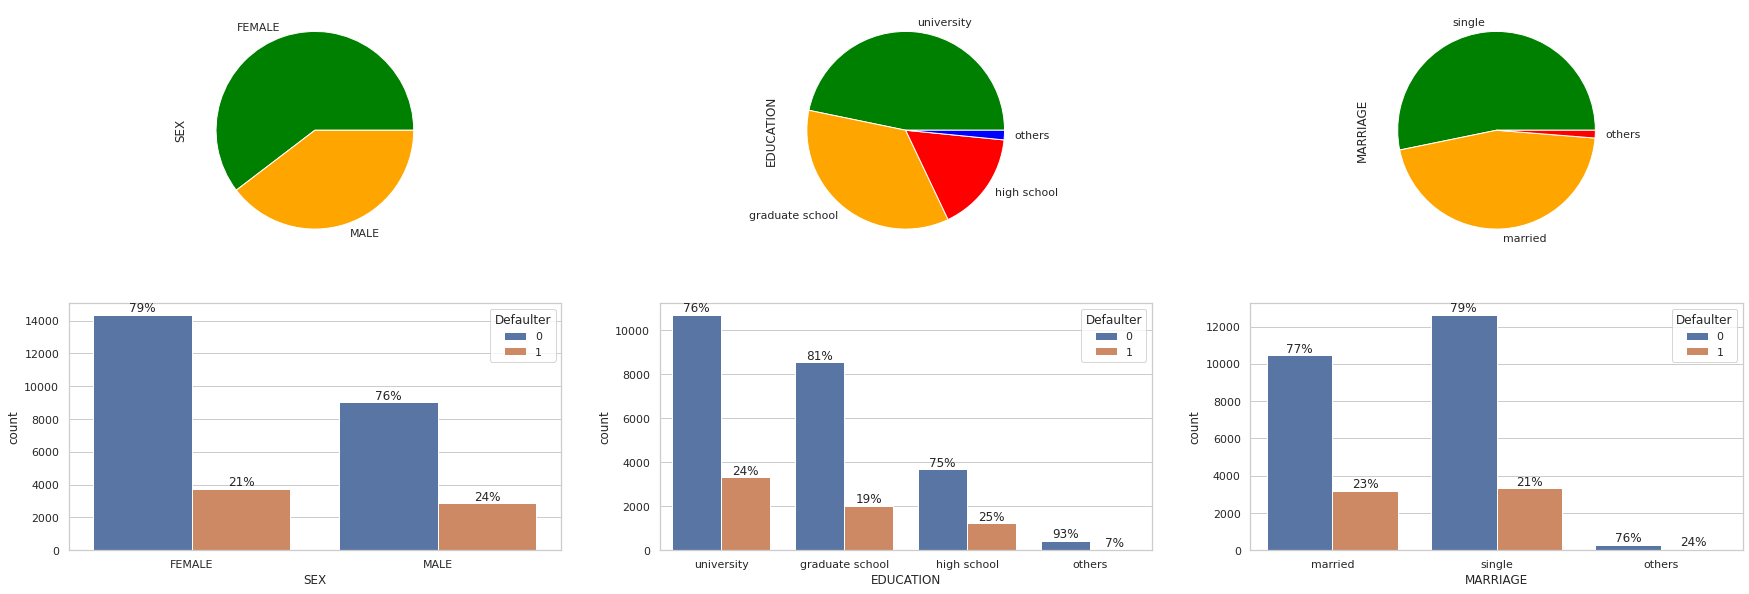

In [ ]:
plt.figure(figsize=(100,5))
fig, axes = plt.subplots(nrows=2,ncols=3,figsize=(30,10))
i=0
total = len(df_cat)

for cat in categorical_features:
  plt.subplot(2,3,1+i)
  df_cat[cat].value_counts().plot(kind="pie",subplots=True, colors=['green', 'orange', 'red', 'blue'])

  plt.subplot(2,3,4+i)
  ax = sns.countplot(x = cat, hue = 'Defaulter', data = df_cat)
  barPerc(df_cat, cat, ax)

  i += 1


### Numerical variables
We have 5 different numerical features:
* Limit_Bal
* Age
* Bill_Amt
* Pay_Amt
* Pay



In statistics, the Kernel Density Estimation (KDE) is a fairly well known technique
for estimating the probability density function in a non parametric way (i.e. it does
not assume any underlying distribution). So, for the following continous attribute
We explore their KDE plots.

#### Limit Balance

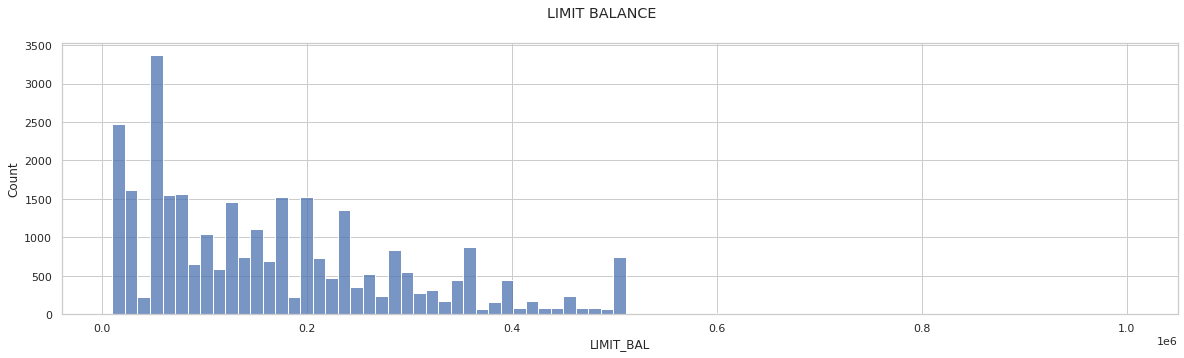

In [ ]:
plt.subplots(figsize=(20,5))
plt.suptitle('LIMIT BALANCE')
sns.histplot(data=df, x=df.LIMIT_BAL)

It is possible to observe from Figure below that most of the default come from credits
with a lower LIMIT_BAL (i.e. credit amount), in particular they are observed in a range among a few thousands NT dollars to around $150; 000. Above this threshold the customers are more likely to repay their debts.

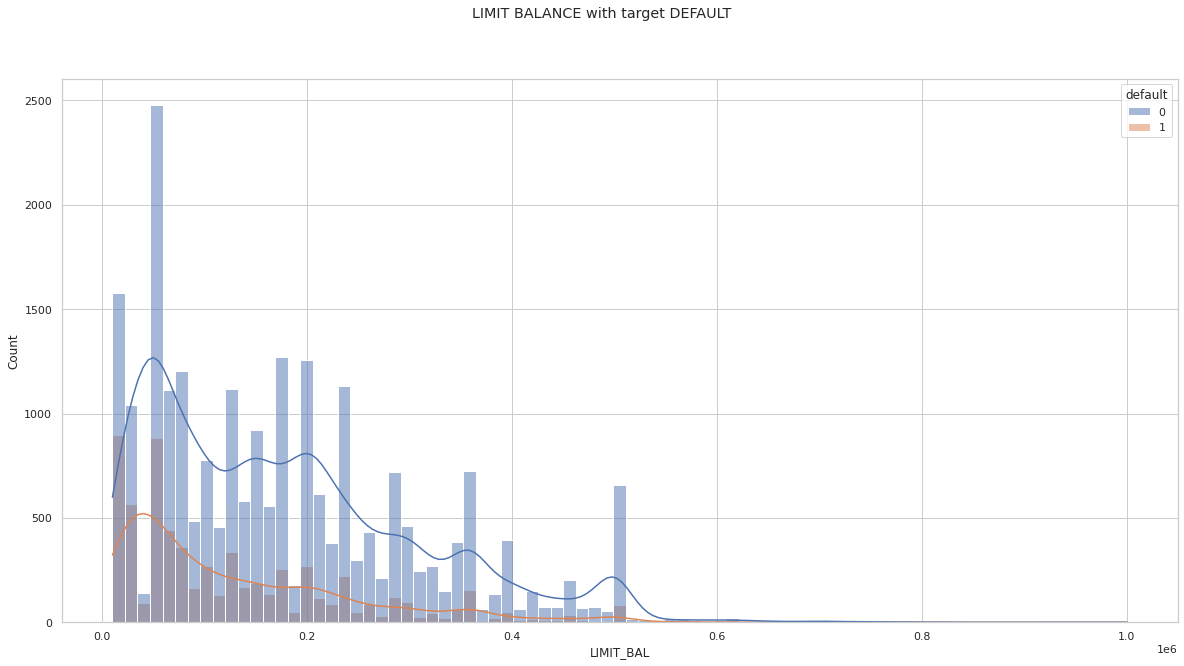

In [ ]:
plt.subplots(figsize=(20,10))
plt.suptitle('LIMIT BALANCE with target DEFAULT')
sns.histplot(data=df, x=df.LIMIT_BAL, hue=df.default, kde=True)

#### Age

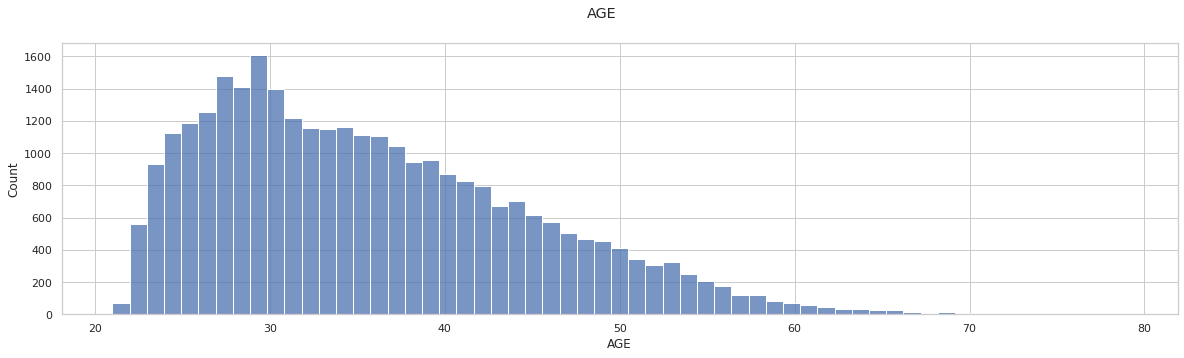

In [ ]:
plt.subplots(figsize=(20,5))
plt.suptitle('AGE')
sns.histplot(data=df, x=df.AGE, bins=59)

Looking at the below distribution, it's clear that there are more people who are aged between 20-30 and it goes on decreasing after 30. It is also a bit right skewed

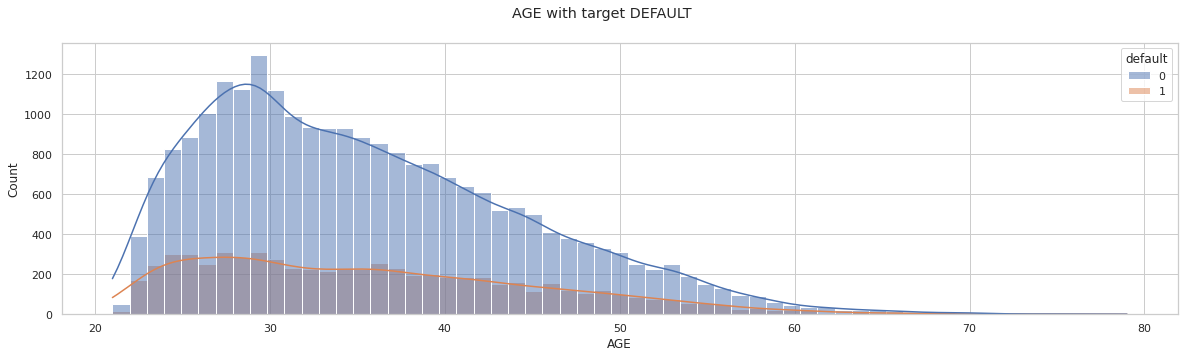

In [ ]:
plt.subplots(figsize=(20,5))
plt.suptitle('AGE with target DEFAULT')
sns.histplot(data=df, x=df.AGE, hue=df.default, kde=True, bins= 59)

We have maximum clients from 21-30 age group followed by 31-40. Hence with increasing age group the number of clients that will default the payment next month is decreasing.

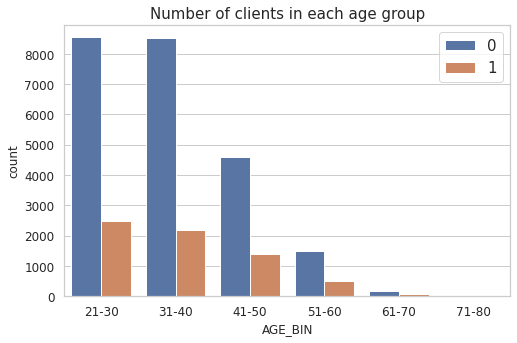

In [ ]:
bins = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']
df['AGE_BIN'] = pd.cut(x=df.AGE, bins=bins, labels=names, right=True)

plt.subplots(figsize=(8,5))
sns.countplot(data=df, x='AGE_BIN',hue='default')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of clients in each age group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

#### Bill Amount

<Figure size 432x288 with 0 Axes>

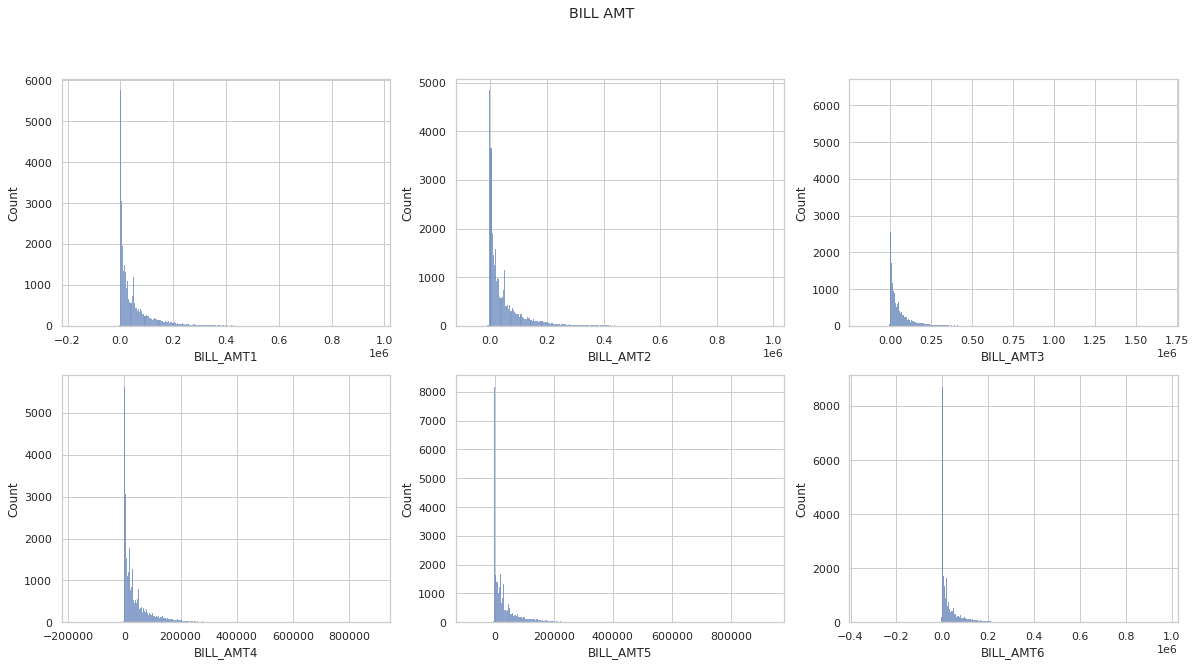

In [ ]:
plt.figure()
fig, axes = plt.subplots(nrows=2,ncols=3,figsize=(20,10))
fig.suptitle('BILL AMT')
bills = ['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
df_bills = df[bills]

for i, col in enumerate(bills):
  plt.subplot(2,3,1+i)
  sns.histplot(df_bills[col])

#### Paid Amount

<Figure size 432x288 with 0 Axes>

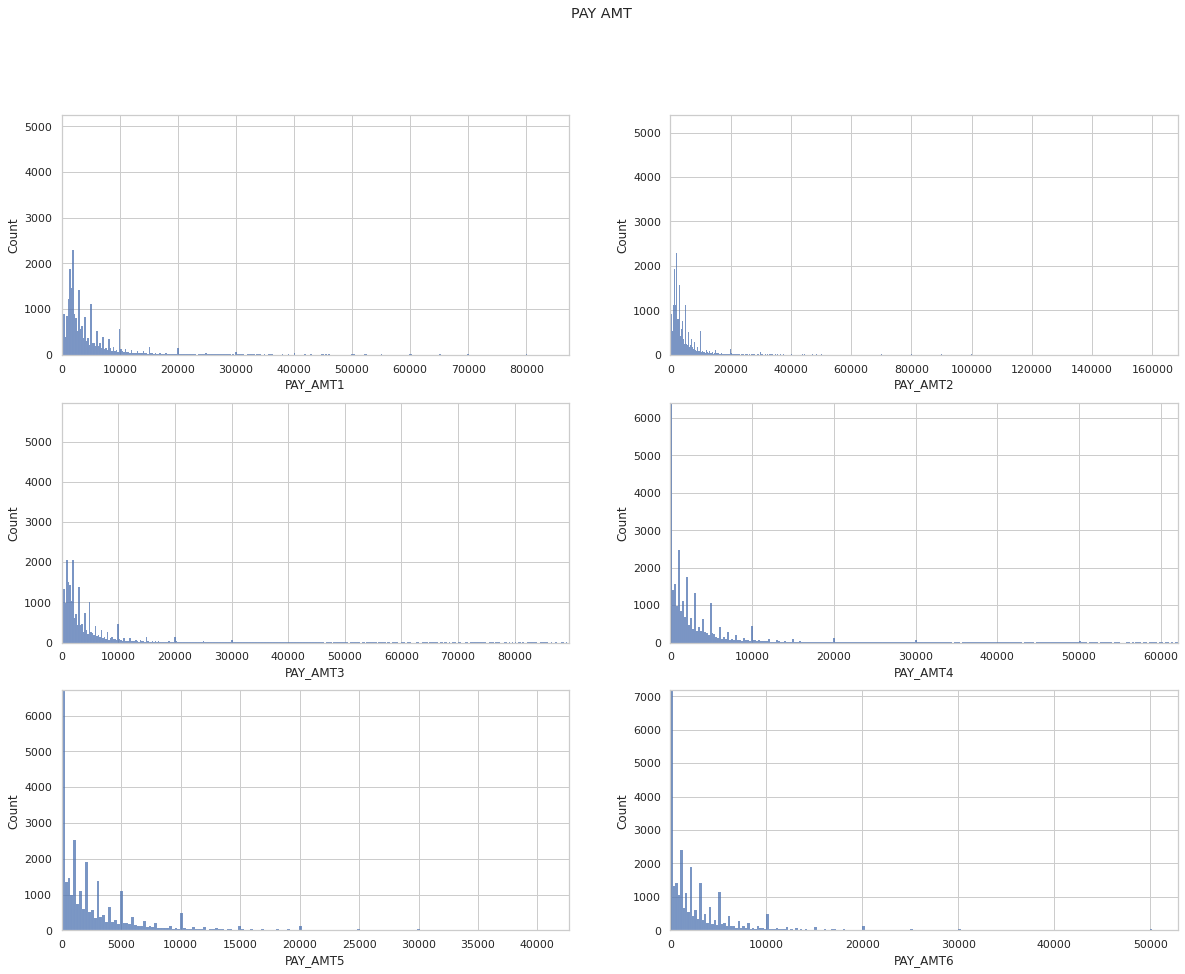

In [ ]:
plt.figure()
fig, axes = plt.subplots(nrows=3,ncols=2,figsize=(20,15))
fig.suptitle('PAY AMT')
pays_amt = ['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
df_pays_amt = df[pays_amt]

for i, col in enumerate(pays_amt):
  plt.subplot(3,2,1+i)
  ax = sns.histplot(df_pays_amt[col])
  ax.set_xlim(-10,df_pays_amt[col].max()/10)
  ax.set_ylim([0,df_pays_amt[col].value_counts().max()])

plt.show()

#### Pay

<Figure size 432x288 with 0 Axes>

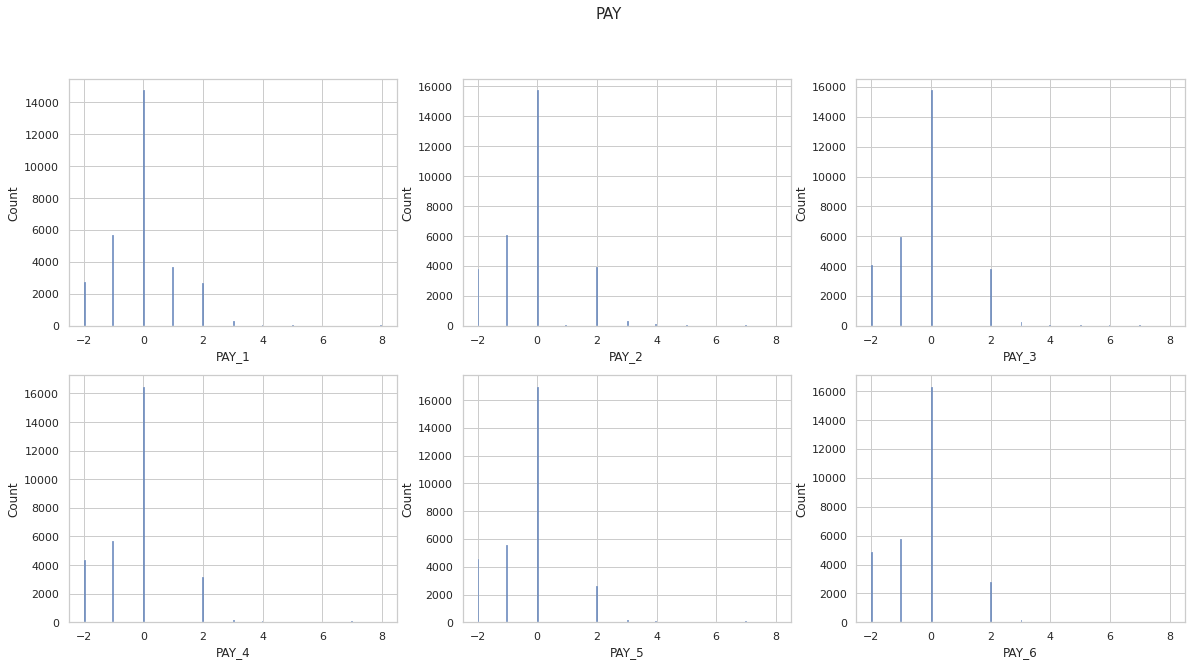

In [ ]:
plt.figure()
fig, axes = plt.subplots(nrows=2,ncols=3,figsize=(20,10))
pays = ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
df_pays = df[pays]
fig.suptitle("PAY", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


for i, col in enumerate(pays):
  plt.subplot(2,3,1+i)
  sns.histplot(data=df_pays, x=col)
  

We transform value '0' and '-2' in '-1' because we didn't expect that values from the dataset description

In [ ]:
pays = ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']


for p in pays:
  corr = (df[p] == -2) | (df[p] == -1) | (df[p] == 0)
  df.loc[corr, p] = -1

<Figure size 432x288 with 0 Axes>

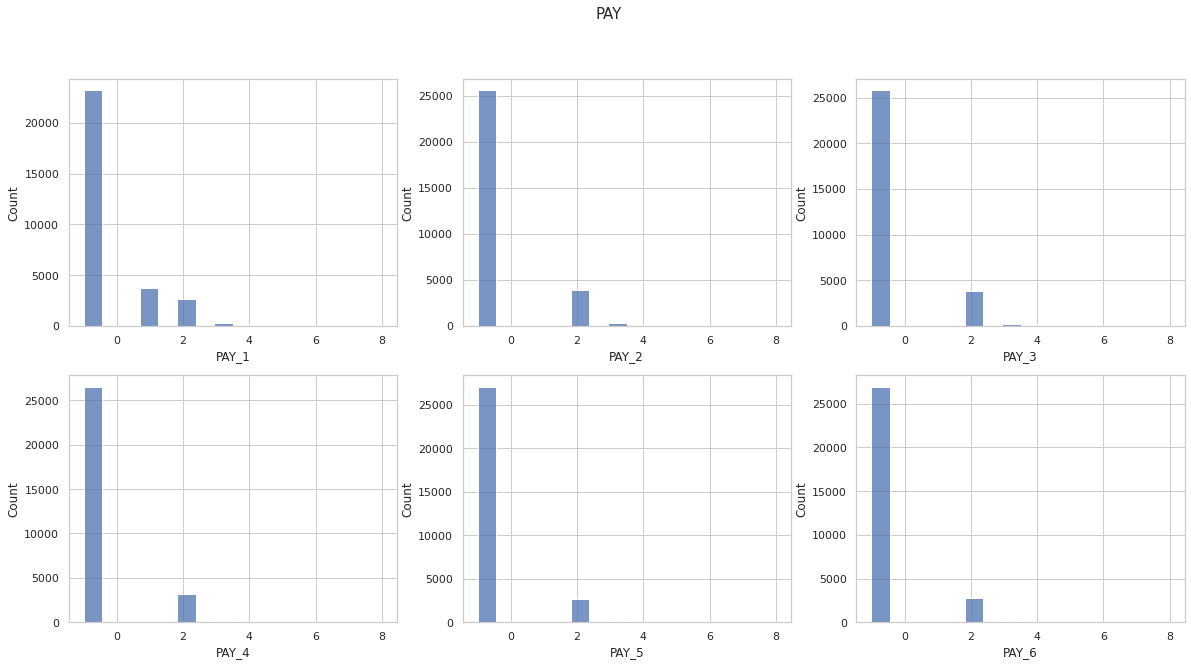

In [ ]:
plt.figure()
fig, axes = plt.subplots(nrows=2,ncols=3,figsize=(20,10))
pays = ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
df_pays = df[pays]
fig.suptitle("PAY", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


for i, col in enumerate(pays):
  plt.subplot(2,3,1+i)
  sns.histplot(data=df_pays, x=col)

The major number of customers pays the previous amount duly whilewhile a lower percentage of them pay late.
As a direct consequence, the probability of default increase as the number of delayed payments increase.

### Correlation

Correlation is a statistical measure that expresses the strength of the relationship between two variables. The two main types of correlation are positive and negative. Positive correlation occurs when two variables move in the same direction; as one increases, so do the other. For example, there is a positive correlation between hours of study and grades on a test. A negative correlation occurs when two variables move in opposite directions; as one increases, the other decreases. For example, there is a negative correlation between smoking and life expectancy. Correlation can be used to test hypotheses about cause and effect relationships between variables. Correlation is often used in the real world to predict trends. For example, if there is a strong positive correlation between the number of hours spent studying and grades on a test, we can predict that if someone spends more hours studying, they will get a higher grade on the test.
However, correlation does not necessarily imply causation; other factors may be at play. 
If there are multiple variables and the goal is to find the correlation between all of these variables and store them using the appropriate data structure, the matrix data structure is used. Such a matrix is called a correlation matrix. A correlation matrix is a table that shows the correlation coefficients between a set of variables. Correlation matrices are used to determine which pairs of variables are most closely related. They can also be used to identify relationships between variables that may not be readily apparent.

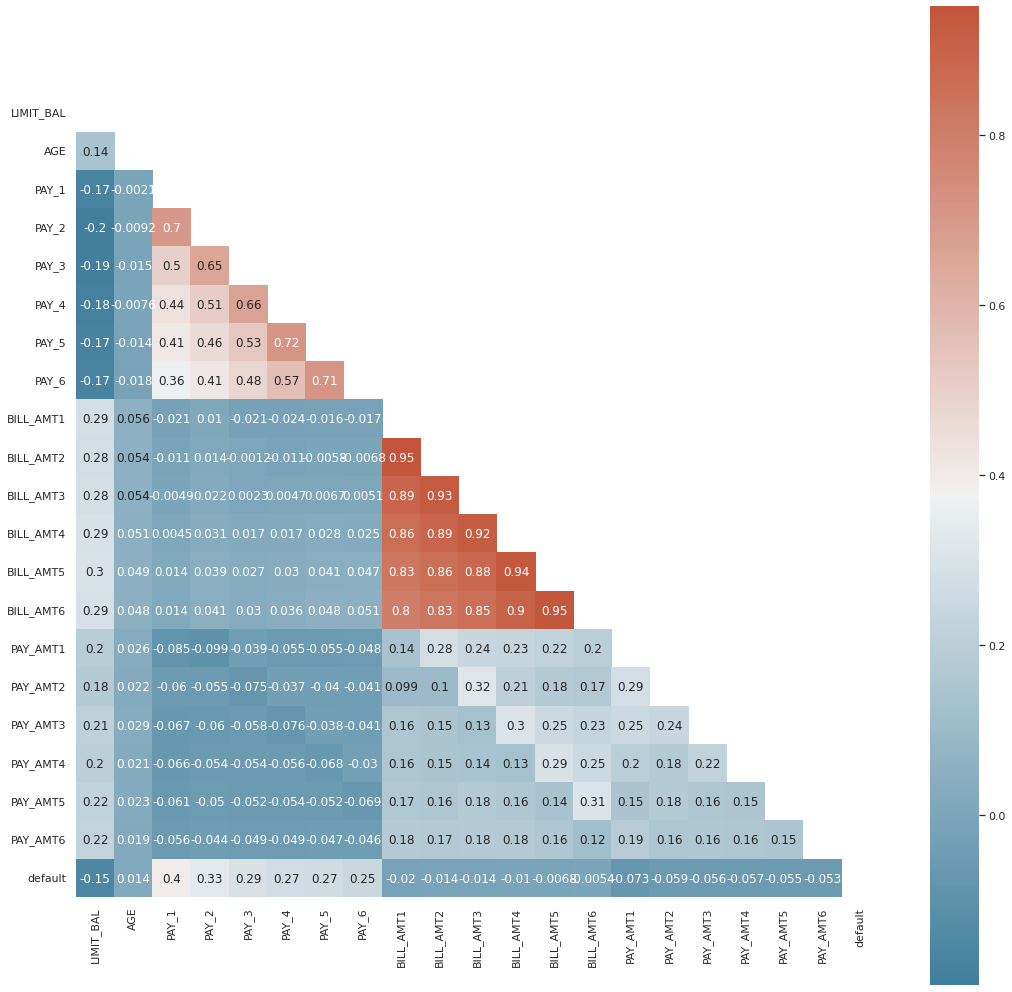

In [ ]:
# The heatmat shows that features are correlated with each other (collinearity), such us like PAY_1,2,3,4,5,6 and BILL_AMT1,2,3,4,5,6. In those cases, the correlation is positive.
plt.figure(figsize = (18,18))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr,annot = True,square = True,mask=mask,cmap=cmap)

None of the variables have a strong correlation with the defaulting chance of the customer.
* 'PAY_' variables have a small amount of positive correlation with the target variable and a stronger correlation amongst themselves. So, if we have or haven't defaulted in the previous months could decide the probability of defaulting in the next month.

* 'BILL_AMT' variables have a strong positive correlation amongst themselves. 

* 'LIMIT_BAL' has a positive correlation with 'BILLAMT' and a negative correlation with 'PAY' variables.

## PCA

Dimensionality reduction is the transformation of the data from an high dimensional space to a low dimensional space. It has several advantages, one of them is that it helps avoiding the curse of dimensionality, a very common phenomenon in Big Data environments. In particular, it states that when the dimensionality increases, the volume of the space drastically increases as well and the data become more and more sparse. As a consequence, as the number of dimensions grows, the amount of data that we need to generalize enough grows exponentially.
The dimensionality reduction technique we will be using is called the Principal Component Analysis (PCA). It is a powerful technique that arises from linear algebra and probability theory. In essence, it computes a matrix that represents the variation of your data (covariance matrix/eigenvectors), and rank them by their relevance (explained variance/eigenvalues).

[https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60)

In [ ]:
df.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,AGE_BIN
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,FEMALE,university,married,24,2,2,-1,-1,-1,...,0,0,0,689,0,0,0,0,1,21-30
2,120000,FEMALE,university,single,26,-1,2,-1,-1,-1,...,3455,3261,0,1000,1000,1000,0,2000,1,21-30
3,90000,FEMALE,university,single,34,-1,-1,-1,-1,-1,...,14948,15549,1518,1500,1000,1000,1000,5000,0,31-40
4,50000,FEMALE,university,married,37,-1,-1,-1,-1,-1,...,28959,29547,2000,2019,1200,1100,1069,1000,0,31-40
5,50000,MALE,university,married,57,-1,-1,-1,-1,-1,...,19146,19131,2000,36681,10000,9000,689,679,0,51-60


Since Sklearn only uses numerical values we need to one-hot encode the categorical variables in dataset
Categorical variables are SEX, EDUCATION, MARRIAGE, AGE_BIN.

Each category value is converted into a new column and assigned a 1 or 0 (notation for true/false) value to the column.

In [ ]:
# LABEL ENCODING FOR SEX  because the scaler could not convert string to float: 'FEMALE'
encoders_nums = {
                 "SEX":{"FEMALE": 0, "MALE": 1}
}
df = df.replace(encoders_nums)

#One Hot encoding EDUCATION, MARRIAGE AND AGE_BIN
df = pd.get_dummies(df, columns = ['EDUCATION','MARRIAGE', 'AGE_BIN'])
df.head()

,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,EDUCATION_university,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single,AGE_BIN_21-30,AGE_BIN_31-40,AGE_BIN_41-50,AGE_BIN_51-60,AGE_BIN_61-70,AGE_BIN_71-80
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,0,24,2,2,-1,-1,-1,-1,3913,...,1,1,0,0,1,0,0,0,0,0
2,120000,0,26,-1,2,-1,-1,-1,2,2682,...,1,0,0,1,1,0,0,0,0,0
3,90000,0,34,-1,-1,-1,-1,-1,-1,29239,...,1,0,0,1,0,1,0,0,0,0
4,50000,0,37,-1,-1,-1,-1,-1,-1,46990,...,1,1,0,0,0,1,0,0,0,0
5,50000,1,57,-1,-1,-1,-1,-1,-1,8617,...,1,1,0,0,0,0,0,1,0,0


We split the dataset in 70/30 for train/test

In [ ]:
X = df.drop('default', axis = 1)
y = df.default

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

PCA is effected by scale so you need to scale the features in your data before applying PCA. Use StandardScaler to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms. We fit on the training set and transform on the training and test set.

In [ ]:
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)


[https://plotly.com/python/pca-visualization/](https://plotly.com/python/pca-visualization/)

In [ ]:
pca_tot = PCA()
pca_tot.fit(X_train_std)

exp_var_cumul = np.cumsum(pca_tot.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

We choose 0.90 for the number of components parameter. It means that scikit-learn choose the minimum number of principal components such that 90% of the variance is retained.

You can find out how many components PCA choose after fitting the model using pca.n_components_ . In this case, 90% of the variance amounts to 19 principal components.

In [ ]:
# Make an instance of the Model, 90% della varianza
pca = PCA(.90)

# Fit PCA on training set. Note: you are fitting PCA on the training set only.
pca.fit(X_train_std)

# You can find out how many components PCA choose after fitting the model using pca.n_components_
pca.n_components_

19

In [ ]:
X_train_pca = pca.transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [ ]:
exp_var = pca.explained_variance_ratio_

The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can convert 4 dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this. By using the attribute explained_variance_ratio_, you can see from the previously graph, that the first five principal component contains 50% of the variance.

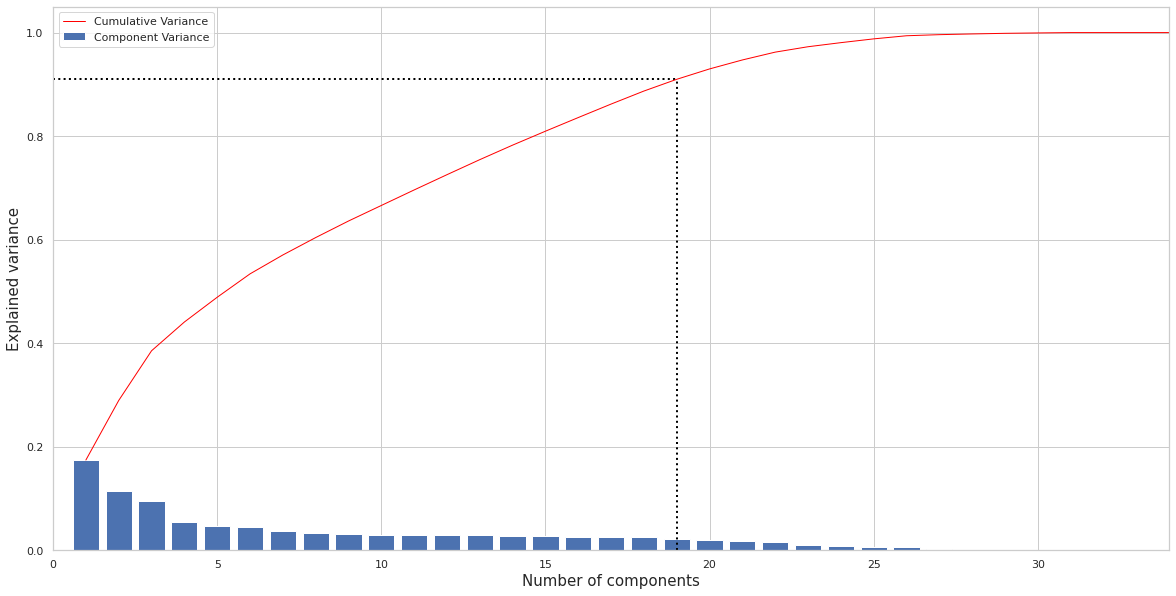

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

n_feat = 34
ax.set_xlim(0,n_feat)

exp_var_tot = pca_tot.explained_variance_ratio_ #varianza con tutte le features

ax.bar(range(1,len(exp_var_tot)+1), #ax.bar(range(1,len(exp_var)+1),
         exp_var_tot, 
        label="Component Variance",
        )
ax.plot(range(1,len(exp_var_tot)+1),
         np.cumsum(exp_var_tot),
         c='red',
         label="Cumulative Variance",
         linewidth = 1
        )

# i valori li prendiamo dal grafico precedente

plt.vlines(x=19, ymin=0, ymax=0.9097, colors='black', ls=':', lw=2)
plt.hlines(y=0.9097, xmin=0, xmax=19, colors='black', ls=':', lw=2)

ax.set_ylabel('Explained variance', fontdict= {"size":15})
ax.set_xlabel('Number of components', fontdict= {"size":15})
ax.legend(loc='upper left')
# plt.savefig('../images/10-PCA.svg')
plt.show()

## Sampling

As we have seen earlier, we have an imbalanced dataset. The problem is that when a model learn from an imbalanced dataset, the predictions not will be 
very accurate , because the models tend to prefer the majority
class. To try to solve this problem we try to rebalance 
the training set. Rebalancing involves creating a new transformed version of the training dataset in which the selected examples have a different class distribution. In this thesis we try this strategy:
* Random Oversampling: Randomly duplicate examples in the minority class.
* Random Undersampling: Randomly delete examples in the majority class.
* SMOTE: Synthetic Minority Oversampling Technique
* SMOTEENN: Combination of over (SMOTE) and under-sampling (ENN: Edited
Nearest Neighbours)

[www.kaggle.com/code/rafjaa/resampling-strategies-for-imbalanced-datasets/notebook](https://www.kaggle.com/code/rafjaa/resampling-strategies-for-imbalanced-datasets/notebook)
[www.mastersindatascience.org/learning/statistics-data-science/undersampling/](https://www.mastersindatascience.org/learning/statistics-data-science/undersampling/)



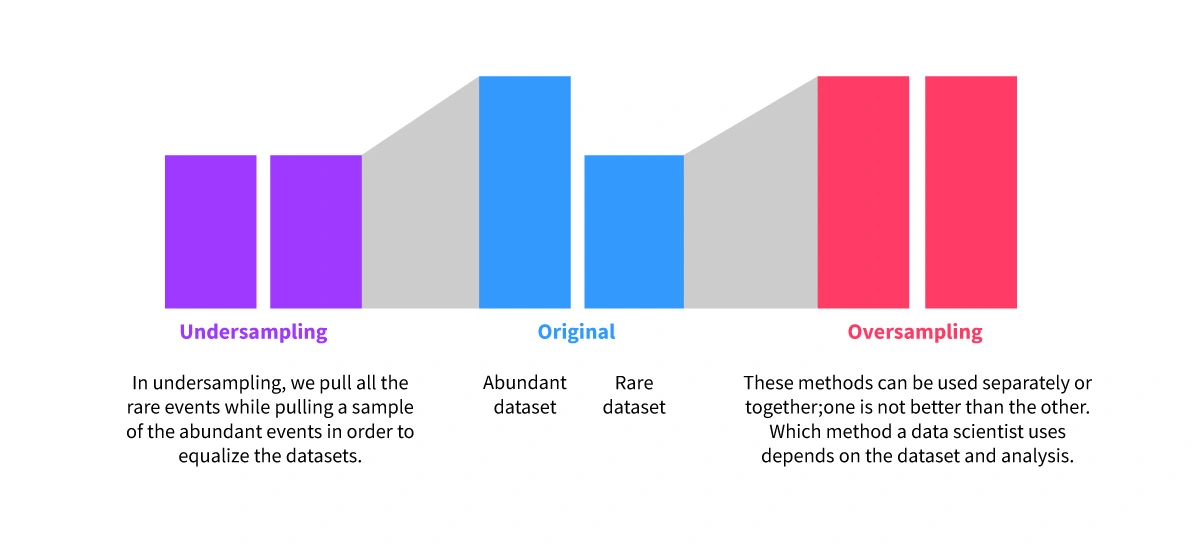

16324
-----------
4676
-----------
0    16324
1     4676
Name: default, dtype: int64


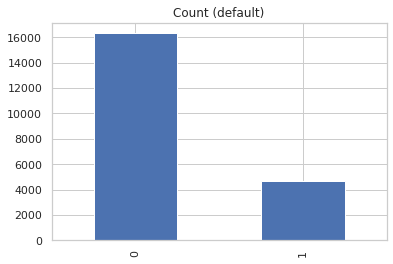

In [ ]:
# create the training df by remerging X_train and y_train
df_train = X_train.join(y_train)

# We have observed that there is imbalance in the samples. Let's see the distribution of the samples in the train dataset
# Separate majority and minority classes
df_majority = df_train[df_train.default == 0]
df_minority = df_train[df_train.default == 1]

df_train.default.value_counts().plot(kind='bar', title='Count (default)')
print(df_majority.default.count())
print("-----------")
print(df_minority.default.count())
print("-----------")
print(df_train.default.value_counts())

### Random Oversampling

Random oversampling involves randomly duplicating examples from the minority class and adding them to the training dataset.
Examples from the training dataset are selected randomly with replacement. This means that examples from the minority class can be chosen and added to the new “more balanced” training dataset multiple times; they are selected from the original training dataset, added to the new training dataset, and then returned or “replaced” in the original dataset, allowing them to be selected again.

0    16324
1    16324
Name: default, dtype: int64


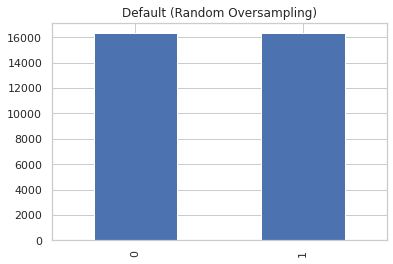

In [ ]:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,         # sample with replacement
                                 n_samples = 16324,    # to match majority class
                                 random_state= 42)
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

print(df_upsampled.default.value_counts())

df_upsampled.default.value_counts().plot(kind='bar', title='Default (Random Oversampling)')

X_up = df_upsampled.drop('default', axis = 1)
y_up = df_upsampled.default

### Random Undersampling

Random undersampling involves randomly selecting examples from the majority class to delete from the training dataset.
This has the effect of reducing the number of examples in the majority class in the transformed version of the training dataset. This process can be repeated until the desired class distribution is achieved, such as an equal number of examples for each class.
This approach may be more suitable for those datasets where there is a class imbalance although a sufficient number of examples in the minority class, such a useful model can be fit.

0    4676
1    4676
Name: default, dtype: int64


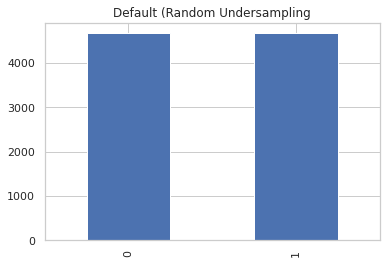

In [ ]:
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=4676,     # to match minority class
                                 random_state=587) 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

print(df_downsampled.default.value_counts())

df_downsampled.default.value_counts().plot(kind='bar', title='Default (Random Undersampling')

X_down = df_downsampled.drop('default', axis = 1)
y_down = df_downsampled.default

### SMOTE

SMOTE is the most commom technique of oversampling, acronym of Synthetic Minority Oversampling Technique.

SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.The algorithm, creates syntetic samples from the minority class instead of creating copies.

For our study we use this technique respect the random oversampling.


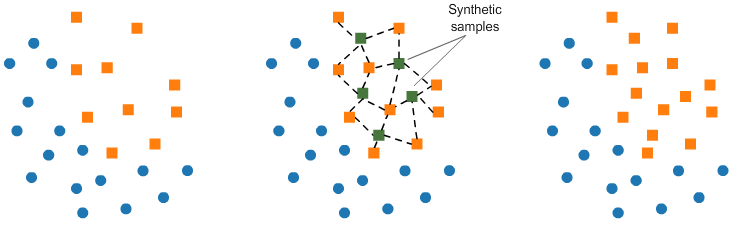

1    16324
0    16324
Name: default, dtype: int64


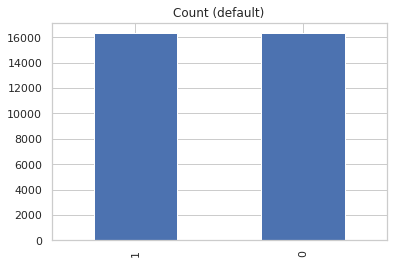

In [ ]:
sm = SMOTE(random_state=42)
X_SMOTE, y_SMOTE = sm.fit_resample(X_train, y_train)

print(y_SMOTE.value_counts())
y_SMOTE.value_counts().plot(kind='bar', title='Count (default)')

### SMOTEEN

We try also the combination of under and over sampling.
One algorithm that allows to do so is SMOTEENN, a combination of SMOTE and Edited Nearest Neighbours. In particular, it combines SMOTE for generating synthetic examples for the minority class and ENN ability to delete some observations from both classes that are identified as having different class between the observation’s class and its K-nearest neighbor majority class.

0    7567
1    7567
Name: default, dtype: int64


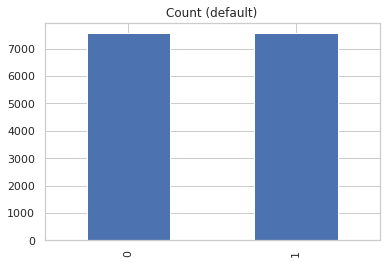

In [ ]:
'''sampling_strategy is float, corresponds to the desired ratio of the number of samples in the minority class over the number of samples in the majority class after resampling.
the ratio is expressed as \alpha_{os} = N_{rm} / N_{M} where N_{rm} is the number of samples in the minority class 
after resampling and N_{M} is the number of samples in the majority class.'''

sm_nn = SMOTEENN(random_state=42, sampling_strategy = 0.78)
X_train_under_over, y_train_under_over = sm_nn.fit_resample(X_train, y_train)
print(y_train_under_over.value_counts())
y_train_under_over.value_counts().plot(kind='bar', title='Count (default)')

### Overview of sampling methods

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

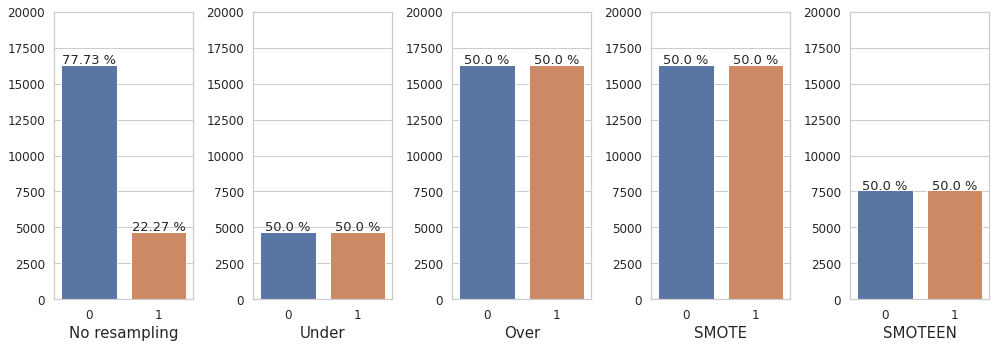

In [ ]:
y_list = [y_train, df_downsampled['default'], df_upsampled['default'], y_SMOTE, y_train_under_over]
y_list_labels = ['No resampling', 'Under', 'Over', 'SMOTE', 'SMOTEEN']

plt.figure(figsize=(14,5))
plt.title('Sampling')

i = 1
for value, label in zip(y_list,y_list_labels):    
    plt.subplot(1,5,i)
    graph_target = sns.countplot(value)
    plt.xlabel(label, fontdict= {"size":15})
    plt.ylabel('')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    # annotate?
    
    j=0
    for p in graph_target.patches:
        height = p.get_height()

        str_plot = f'{round(100 * value.value_counts()[j]/len(value),2)} %'

        graph_target.text(p.get_x()+p.get_width()/2., height + 100 , str_plot, ha="center", fontsize = 13)
        j += 1
        
    i += 1
    graph_target.set_ylim(0, 20000) 

plt.tight_layout()
#plt.savefig('../images/12-resampling-02.svg')
plt.show()

## Model 

Now we will attempt to build various models, fit the training data and predict on the test data. We will aim to find the best model and check how the accuracy varies with the parameters.

We try different approaches and different models to solving
our problem. In particular: 

* K Nearest Neighbors
* Decision Tree
* Random Forest
* SVM

For each model we evaluate different train shapes:

1. Standard 
2. PCA
3. SMOTE (Oversampling)
4. Undersampling
5. SMOTEEN

To evaluate the model since our dataset is imbalanced, maximizing the accuracy
is not the best option because we may have an high number of correct classification, mostly from the majority class.
In this case we are more interested in the number of False Negatives
(i.e. default classified -> default) and the number of False Positives
(i.e. no default -> default).

We will use metrics such as Precision, Recall and F1 Scores to compare the models. To visualize the results we will make use of line plots and confusion matrix. The plots will help us choose the optimum parameter and confusion matrix will help us to calculate the F1 score. 
From the confusion matrix we can see the number of predictions with their respective true and predicted label.

[https://towardsdatascience.com/a-look-at-precision-recall-and-f1-score-36b5fd0dd3ec](https://towardsdatascience.com/a-look-at-precision-recall-and-f1-score-36b5fd0dd3ec)



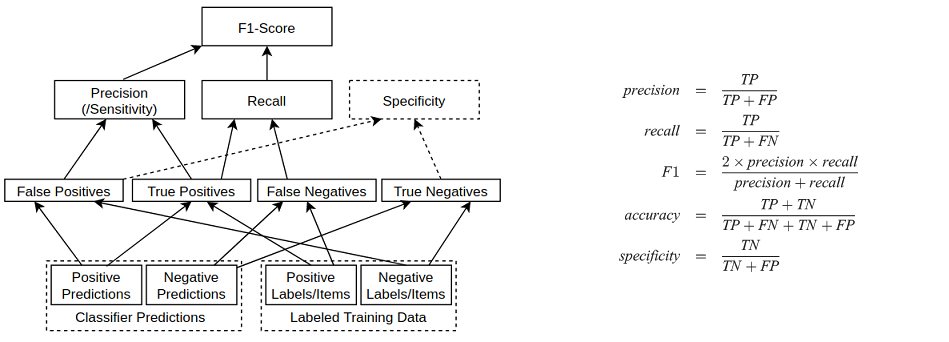

In [ ]:
best_results = pd.DataFrame(columns= ['Data Train',	'Best Score',	'Train accuracy',	'Test accuracy',	'Precision',	'Recall',	'F1 Score',	'Best Parameters',	'Model'])

def test_report(model,X_train,y_train,X_test,y_test):
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_acc = accuracy_score(train_pred, y_train)
    test_acc = accuracy_score(test_pred, y_test)
    prec = precision_score(y_test, test_pred)
    recc = recall_score(y_test, test_pred)
    f1 = f1_score(y_test, test_pred)
    acc_matrices = {'Train accuracy':train_acc,'Test accuracy':test_acc,'Precision':prec,'Recall':recc,'F1 Score':f1}

    print('\nTraining Accuracy Score: ',train_acc)
    print('Testing Accuracy Score: ',test_acc)
    print('Precision on test data: ',prec)
    print('Recall on test data: ',recc)
    print('F1 score on test data: ',f1)
    print('\n========================================================')
    print('Classification Report on Train data')
    print(classification_report(train_pred, y_train))
    print('\n========================================================')
    print('Classification Report on Test data')
    print(classification_report(test_pred, y_test))

    print('\n========================================================')
    # Plotting Confusion Matrix and ROC curve
    f,ax =  plt.subplots(1,2,figsize=(14,6))
    #plt.figure(figsize=(6,4))
    ConfMatrix = confusion_matrix(test_pred, y_test)
    sns.heatmap(ConfMatrix,annot=True, cmap='YlGnBu', fmt="d", 
                xticklabels = ['Non-default', 'Default'], 
                yticklabels = ['Non-default', 'Default'],linewidths=.5,ax = ax[0])
    ax[0].set_ylabel('True label')
    ax[0].set_xlabel('Predicted label')
    ax[0].set_title('Confusion Matrix')

    global fpr,tpr,thresholds
    fpr,tpr,thresholds = roc_curve(test_pred, y_test)
    ax[1].plot(fpr,tpr,color = 'r')
    ax[1].plot(fpr,fpr,color = 'green')
    ax[1].set_ylabel('TPR')
    ax[1].set_xlabel('FPR')
    ax[1].set_title('ROC Curve')
    plt.show()
    return acc_matrices

### KNN

The k-nearest neighbors (KNN) algorithm is a data classification method for estimating the likelihood that a data point will become a member of one group or another based on what group the data points nearest to it belong to.
In essence, KNN performs a voting mechanism to determine the class of an unseen observation. This means that the class with the majority vote will become the class of the data point in question. Importan parameter is K (number of neighbors)
If the value of K is equal to one, then we'll use only the nearest neighbor to determine the class of a data point. If the value of K is equal to ten, then we'll use the ten nearest neighbors, and so on.
To select the K that’s right for your data, we run the KNN algorithm several times with different values of K and choose the K that reduces the number of errors we encounter while maintaining the algorithm’s ability to accurately make predictions when it’s given data it hasn’t seen before.

[https://towardsdatascience.com/knn-k-nearest-neighbors-1-a4707b24bd1d](https://towardsdatascience.com/knn-k-nearest-neighbors-1-a4707b24bd1d)

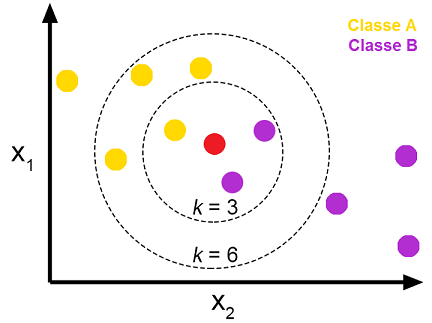

#### Standard KNN

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START n_neighbors=3, weights=uniform.............................
[CV 1/5; 1/16] END n_neighbors=3, weights=uniform;, score=0.712 total time=   0.9s
[CV 2/5; 1/16] START n_neighbors=3, weights=uniform.............................
[CV 2/5; 1/16] END n_neighbors=3, weights=uniform;, score=0.719 total time=   0.9s
[CV 3/5; 1/16] START n_neighbors=3, weights=uniform.............................
[CV 3/5; 1/16] END n_neighbors=3, weights=uniform;, score=0.724 total time=   0.9s
[CV 4/5; 1/16] START n_neighbors=3, weights=uniform.............................
[CV 4/5; 1/16] END n_neighbors=3, weights=uniform;, score=0.707 total time=   0.9s
[CV 5/5; 1/16] START n_neighbors=3, weights=uniform.............................
[CV 5/5; 1/16] END n_neighbors=3, weights=uniform;, score=0.713 total time=   1.0s
[CV 1/5; 2/16] START n_neighbors=3, weights=distance............................
[CV 1/5; 2/16] END n_neighbors=3, weig

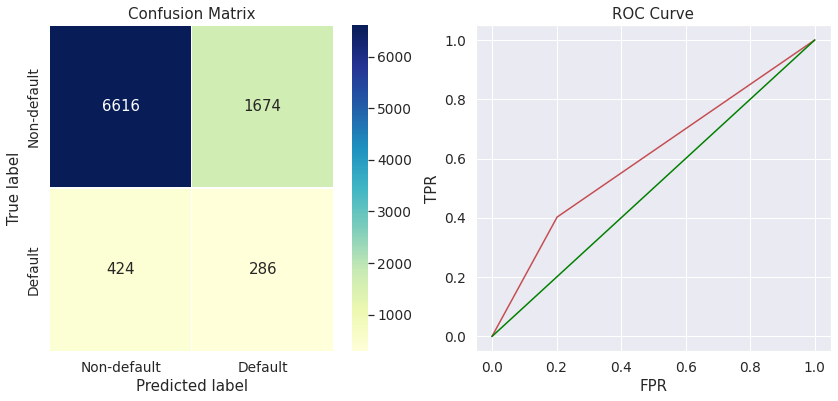

In [ ]:
# normale
param_grid = {'n_neighbors':[3, 4, 5, 6, 10, 20, 50, 75], 'weights': ['uniform', 'distance']}
knn = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid, cv=5, scoring = 'f1_weighted', verbose = 10)
knn = knn.fit(X_train, y_train)

print('Best Score: ',knn.best_score_)
print('Best Parameters: ',knn.best_params_)
Acc_mat_knn = test_report(knn,X_train,y_train,X_test,y_test)

#### PCA

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START n_neighbors=3, weights=uniform.............................
[CV 1/5; 1/16] END n_neighbors=3, weights=uniform;, score=0.763 total time=   0.9s
[CV 2/5; 1/16] START n_neighbors=3, weights=uniform.............................
[CV 2/5; 1/16] END n_neighbors=3, weights=uniform;, score=0.752 total time=   0.9s
[CV 3/5; 1/16] START n_neighbors=3, weights=uniform.............................
[CV 3/5; 1/16] END n_neighbors=3, weights=uniform;, score=0.759 total time=   0.9s
[CV 4/5; 1/16] START n_neighbors=3, weights=uniform.............................
[CV 4/5; 1/16] END n_neighbors=3, weights=uniform;, score=0.754 total time=   1.3s
[CV 5/5; 1/16] START n_neighbors=3, weights=uniform.............................
[CV 5/5; 1/16] END n_neighbors=3, weights=uniform;, score=0.756 total time=   1.4s
[CV 1/5; 2/16] START n_neighbors=3, weights=distance............................
[CV 1/5; 2/16] END n_neighbors=3, weig

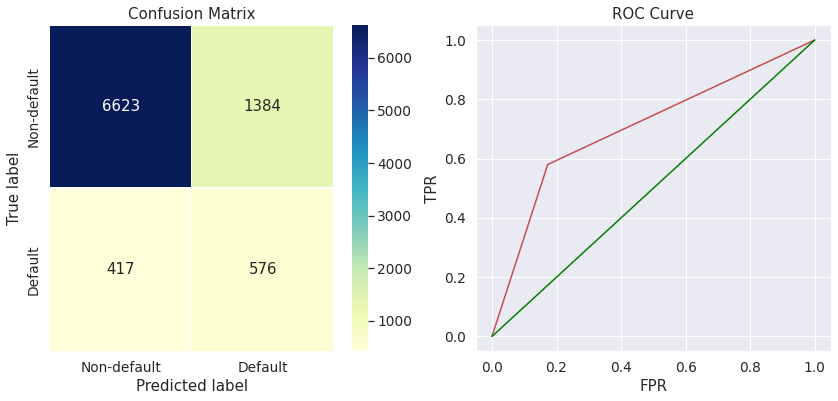

In [ ]:
# PCA
param_grid = {'n_neighbors':[3, 4, 5, 6, 10, 20, 50, 75], 'weights': ['uniform', 'distance']}
knn_pca = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid, cv=5, scoring = 'f1_weighted', verbose = 10)
knn_pca = knn_pca.fit(X_train_pca, y_train)

print('Best Score: ',knn_pca.best_score_)
print('Best Parameters: ',knn_pca.best_params_)
Acc_mat_knn_pca = test_report(knn_pca,X_train_pca,y_train,X_test_pca,y_test)

#### SMOTE (Oversampling)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START n_neighbors=3, weights=uniform.............................
[CV 1/5; 1/16] END n_neighbors=3, weights=uniform;, score=0.751 total time=   2.1s
[CV 2/5; 1/16] START n_neighbors=3, weights=uniform.............................
[CV 2/5; 1/16] END n_neighbors=3, weights=uniform;, score=0.770 total time=   2.1s
[CV 3/5; 1/16] START n_neighbors=3, weights=uniform.............................
[CV 3/5; 1/16] END n_neighbors=3, weights=uniform;, score=0.783 total time=   2.1s
[CV 4/5; 1/16] START n_neighbors=3, weights=uniform.............................
[CV 4/5; 1/16] END n_neighbors=3, weights=uniform;, score=0.780 total time=   2.1s
[CV 5/5; 1/16] START n_neighbors=3, weights=uniform.............................
[CV 5/5; 1/16] END n_neighbors=3, weights=uniform;, score=0.782 total time=   2.1s
[CV 1/5; 2/16] START n_neighbors=3, weights=distance............................
[CV 1/5; 2/16] END n_neighbors=3, weig

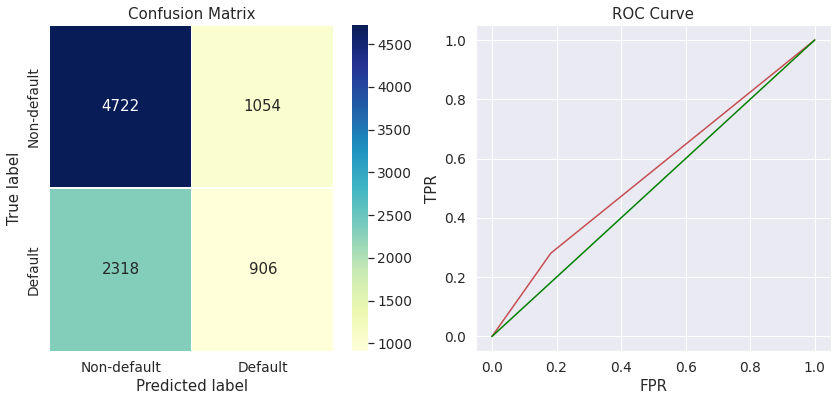

In [ ]:
# SMOTE
param_grid = {'n_neighbors':[3, 4, 5, 6, 10, 20, 50, 75], 'weights': ['uniform', 'distance']}
knn_sm= GridSearchCV(KNeighborsClassifier(), param_grid = param_grid, cv=5, scoring = 'f1_weighted', verbose = 10)
knn_sm = knn_sm.fit(X_SMOTE, y_SMOTE)

print('Best Score: ',knn_sm.best_score_)
print('Best Parameters: ',knn_sm.best_params_)
Acc_mat_knn_sm = test_report(knn_sm,X_SMOTE,y_SMOTE,X_test,y_test)

#### SMOTEENN

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START n_neighbors=3, weights=uniform.............................
[CV 1/5; 1/16] END n_neighbors=3, weights=uniform;, score=0.931 total time=   0.5s
[CV 2/5; 1/16] START n_neighbors=3, weights=uniform.............................
[CV 2/5; 1/16] END n_neighbors=3, weights=uniform;, score=0.931 total time=   0.5s
[CV 3/5; 1/16] START n_neighbors=3, weights=uniform.............................
[CV 3/5; 1/16] END n_neighbors=3, weights=uniform;, score=0.927 total time=   0.5s
[CV 4/5; 1/16] START n_neighbors=3, weights=uniform.............................
[CV 4/5; 1/16] END n_neighbors=3, weights=uniform;, score=0.928 total time=   0.5s
[CV 5/5; 1/16] START n_neighbors=3, weights=uniform.............................
[CV 5/5; 1/16] END n_neighbors=3, weights=uniform;, score=0.930 total time=   0.5s
[CV 1/5; 2/16] START n_neighbors=3, weights=distance............................
[CV 1/5; 2/16] END n_neighbors=3, weig

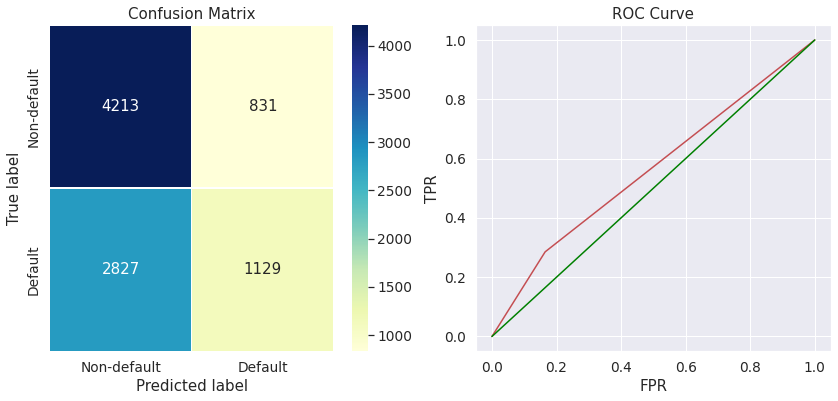

In [ ]:
# SMOTEENN X_train_under_over, y_train_under_over
param_grid = {'n_neighbors':[3, 4, 5, 6, 10, 20, 50, 75], 'weights': ['uniform', 'distance']}
knn_sm_nn= GridSearchCV(KNeighborsClassifier(), param_grid = param_grid, cv=5, scoring = 'f1_weighted', verbose = 10)
knn_sm_nn = knn_sm_nn.fit(X_train_under_over, y_train_under_over)

print('Best Score: ',knn_sm_nn.best_score_)
print('Best Parameters: ',knn_sm_nn.best_params_)
Acc_mat_knn_sm_nn = test_report(knn_sm_nn,X_train_under_over, y_train_under_over,X_test,y_test)

#### Undersampling

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START n_neighbors=3, weights=uniform.............................
[CV 1/5; 1/16] END n_neighbors=3, weights=uniform;, score=0.572 total time=   0.3s
[CV 2/5; 1/16] START n_neighbors=3, weights=uniform.............................
[CV 2/5; 1/16] END n_neighbors=3, weights=uniform;, score=0.578 total time=   0.3s
[CV 3/5; 1/16] START n_neighbors=3, weights=uniform.............................
[CV 3/5; 1/16] END n_neighbors=3, weights=uniform;, score=0.572 total time=   0.3s
[CV 4/5; 1/16] START n_neighbors=3, weights=uniform.............................
[CV 4/5; 1/16] END n_neighbors=3, weights=uniform;, score=0.579 total time=   0.3s
[CV 5/5; 1/16] START n_neighbors=3, weights=uniform.............................
[CV 5/5; 1/16] END n_neighbors=3, weights=uniform;, score=0.577 total time=   0.3s
[CV 1/5; 2/16] START n_neighbors=3, weights=distance............................
[CV 1/5; 2/16] END n_neighbors=3, weig

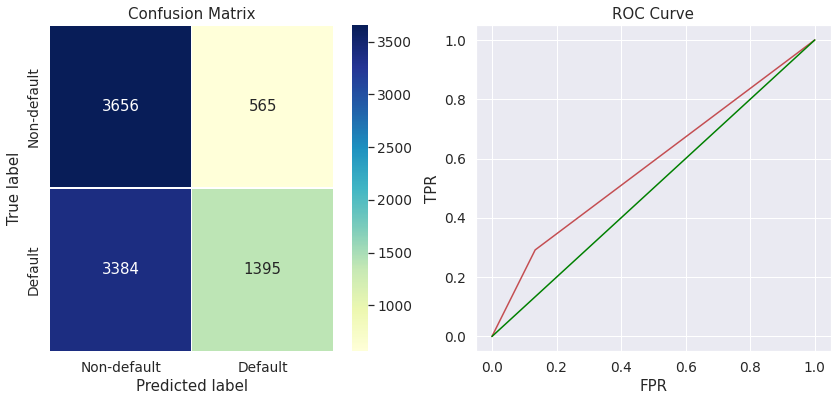

In [ ]:
# UNDER
param_grid = {'n_neighbors':[3, 4, 5, 6, 10, 20, 50, 75], 'weights': ['uniform', 'distance']}
knn_down = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid, cv=5, scoring = 'f1_weighted', verbose = 10)
knn_down = knn_down.fit(X_down, y_down)

print('Best Score: ',knn_down.best_score_)
print('Best Parameters: ',knn_down.best_params_)
Acc_mat_knn_down = test_report(knn_down,X_down,y_down,X_test,y_test)

#### ***Print

In [ ]:
#### Funzione per salvare CSV

header = ['Data Train', 'Best Score', 'Train accuracy', 'Test accuracy', 'Precision', 'Recall', 'F1 Score','Best Parameters']
knn_data = [
    ['Standard',knn.best_score_, Acc_mat_knn['Train accuracy'], Acc_mat_knn['Test accuracy'], Acc_mat_knn['Precision'], Acc_mat_knn['Recall'], Acc_mat_knn['F1 Score'], knn.best_params_],
    ['PCA',knn_pca.best_score_, Acc_mat_knn_pca['Train accuracy'], Acc_mat_knn_pca['Test accuracy'], Acc_mat_knn_pca['Precision'], Acc_mat_knn_pca['Recall'], Acc_mat_knn_pca['F1 Score'], knn_pca.best_params_],
    ['SMOTE',knn_sm.best_score_, Acc_mat_knn_sm['Train accuracy'], Acc_mat_knn_sm['Test accuracy'], Acc_mat_knn_sm['Precision'], Acc_mat_knn_sm['Recall'], Acc_mat_knn_sm['F1 Score'], knn_sm.best_params_],
    ['SMOTEENN',knn_sm_nn.best_score_, Acc_mat_knn_sm_nn['Train accuracy'], Acc_mat_knn_sm_nn['Test accuracy'], Acc_mat_knn_sm_nn['Precision'], Acc_mat_knn_sm_nn['Recall'], Acc_mat_knn_sm_nn['F1 Score'], knn_sm_nn.best_params_],
    ['Undersampling',knn_down.best_score_, Acc_mat_knn_down['Train accuracy'], Acc_mat_knn_down['Test accuracy'], Acc_mat_knn_down['Precision'], Acc_mat_knn_down['Recall'], Acc_mat_knn_down['F1 Score'], knn_down.best_params_],
]
with open('/content/drive/MyDrive/MML/Model/knn.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerow(header)
    writer.writerows(knn_data)

In [ ]:
#knn_results = pd.read_csv("/content/drive/MyDrive/Polito/Magistrale/MML/Project_MML/model_result/knn.csv")
knn_results = pd.read_csv("/content/drive/MyDrive//MML/Model/knn.csv")
knn_results['Model'] = 'KNN'
res = knn_results.iloc[[knn_results['F1 Score'].idxmax()]]
best_results = pd.concat([best_results, res])
best_results

,Data Train,Best Score,Train accuracy,Test accuracy,Precision,Recall,F1 Score,Best Parameters,Model
4,Undersampling,0.606267,0.999465,0.561222,0.291902,0.711735,0.414008,"{'n_neighbors': 75, 'weights': 'distance'}",KNN


<Figure size 720x360 with 0 Axes>

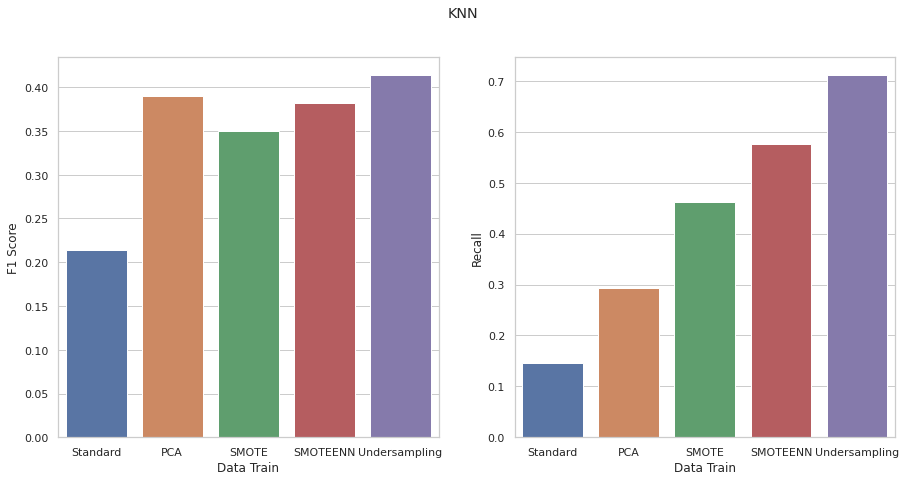

In [ ]:
plt.figure(figsize=(10,5))
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,7))
fig.suptitle('KNN')

plt.subplot(121)
sns.barplot(data=knn_results, x='Data Train', y='F1 Score')

plt.subplot(122)
sns.barplot(data=knn_results, x='Data Train', y='Recall')

### DECISION TREE

Decision Tree algorithm belongs to the family of supervised learning algorithms. Unlike other supervised learning algorithms, the decision tree algorithm can be used for solving regression and classification problems too. 
The goal of using a Decision Tree is to create a training model that can use to predict the class or value of the target variable by learning simple decision rules inferred from prior data(training data). 
In Decision Trees, for predicting a class label for a record we start from the root of the tree. We compare the values of the root attribute with the record’s attribute. On the basis of comparison, we follow the branch corresponding to that value and jump to the next node.
An internal node represents a feature, the branch represents a decision rule, and each leaf node represents the outcome. Some advantages of decision trees are that they require less data preprocessing, i.e., no need to normalize features. However, noisy data can be easily overfitted and results in biased results when the data set is imbalanced.
We use the Gini Impurity to decide which attribute to place at the root or at different levels of the tree as internal nodes is a complicated step.

[https://towardsdatascience.com/from-a-single-decision-tree-to-a-random-forest-b9523be65147](https://towardsdatascience.com/from-a-single-decision-tree-to-a-random-forest-b9523be65147)

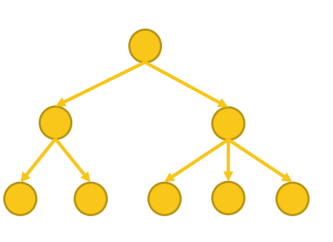

#### Standard DT

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START max_depth=20, min_samples_split=0.1........................
[CV 1/5; 1/12] END max_depth=20, min_samples_split=0.1;, score=0.800 total time=   0.1s
[CV 2/5; 1/12] START max_depth=20, min_samples_split=0.1........................
[CV 2/5; 1/12] END max_depth=20, min_samples_split=0.1;, score=0.790 total time=   0.2s
[CV 3/5; 1/12] START max_depth=20, min_samples_split=0.1........................
[CV 3/5; 1/12] END max_depth=20, min_samples_split=0.1;, score=0.788 total time=   0.2s
[CV 4/5; 1/12] START max_depth=20, min_samples_split=0.1........................
[CV 4/5; 1/12] END max_depth=20, min_samples_split=0.1;, score=0.793 total time=   0.2s
[CV 5/5; 1/12] START max_depth=20, min_samples_split=0.1........................
[CV 5/5; 1/12] END max_depth=20, min_samples_split=0.1;, score=0.788 total time=   0.2s
[CV 1/5; 2/12] START max_depth=20, min_samples_split=0.2........................
[CV 1/5; 2/12

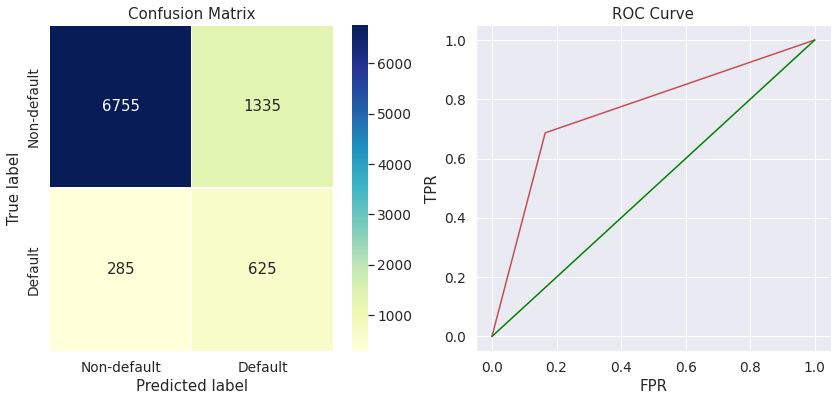

In [ ]:
# normale
param_grid = {'max_depth': [20,30,50,100], 'min_samples_split':[0.1,0.2,0.4]}
dtc = GridSearchCV(DecisionTreeClassifier(), param_grid = param_grid, cv=5, scoring = 'f1_weighted', verbose = 10)
dtc = dtc.fit(X_train, y_train)

print('Best Score: ',dtc.best_score_)
print('Best Parameters: ',dtc.best_params_)
Acc_mat_dtc = test_report(dtc,X_train,y_train,X_test,y_test)

#### PCA

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START max_depth=20, min_samples_split=0.1........................
[CV 1/5; 1/12] END max_depth=20, min_samples_split=0.1;, score=0.774 total time=   0.2s
[CV 2/5; 1/12] START max_depth=20, min_samples_split=0.1........................
[CV 2/5; 1/12] END max_depth=20, min_samples_split=0.1;, score=0.787 total time=   0.2s
[CV 3/5; 1/12] START max_depth=20, min_samples_split=0.1........................
[CV 3/5; 1/12] END max_depth=20, min_samples_split=0.1;, score=0.788 total time=   0.3s
[CV 4/5; 1/12] START max_depth=20, min_samples_split=0.1........................
[CV 4/5; 1/12] END max_depth=20, min_samples_split=0.1;, score=0.768 total time=   0.2s
[CV 5/5; 1/12] START max_depth=20, min_samples_split=0.1........................
[CV 5/5; 1/12] END max_depth=20, min_samples_split=0.1;, score=0.781 total time=   0.3s
[CV 1/5; 2/12] START max_depth=20, min_samples_split=0.2........................
[CV 1/5; 2/12

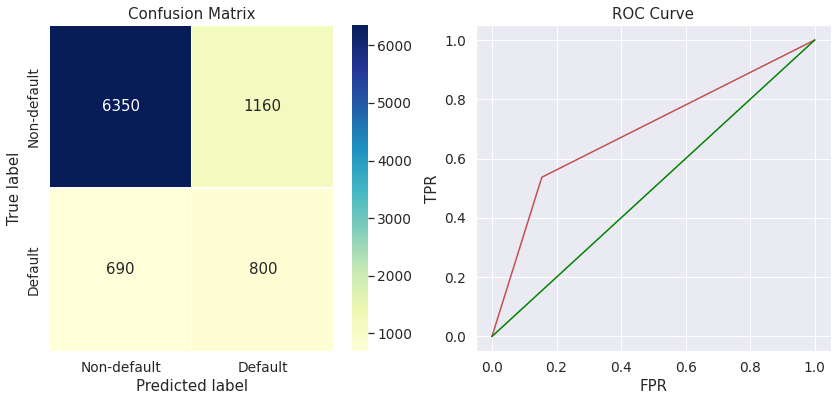

In [ ]:
# PCA
param_grid = {'max_depth': [20,30,50,100], 'min_samples_split':[0.1,0.2,0.4]}
dtc_pca = GridSearchCV(DecisionTreeClassifier(), param_grid = param_grid, cv=5, scoring = 'f1_weighted', verbose = 10)
dtc_pca = dtc_pca.fit(X_train_pca, y_train)

print('Best Score: ',dtc_pca.best_score_)
print('Best Parameters: ',dtc_pca.best_params_)
Acc_mat_dtc_pca = test_report(dtc_pca,X_train_pca,y_train,X_test_pca,y_test)

#### SMOTE

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START max_depth=20, min_samples_split=0.1........................
[CV 1/5; 1/12] END max_depth=20, min_samples_split=0.1;, score=0.665 total time=   0.2s
[CV 2/5; 1/12] START max_depth=20, min_samples_split=0.1........................
[CV 2/5; 1/12] END max_depth=20, min_samples_split=0.1;, score=0.785 total time=   0.2s
[CV 3/5; 1/12] START max_depth=20, min_samples_split=0.1........................
[CV 3/5; 1/12] END max_depth=20, min_samples_split=0.1;, score=0.854 total time=   0.2s
[CV 4/5; 1/12] START max_depth=20, min_samples_split=0.1........................
[CV 4/5; 1/12] END max_depth=20, min_samples_split=0.1;, score=0.852 total time=   0.2s
[CV 5/5; 1/12] START max_depth=20, min_samples_split=0.1........................
[CV 5/5; 1/12] END max_depth=20, min_samples_split=0.1;, score=0.842 total time=   0.2s
[CV 1/5; 2/12] START max_depth=20, min_samples_split=0.2........................
[CV 1/5; 2/12

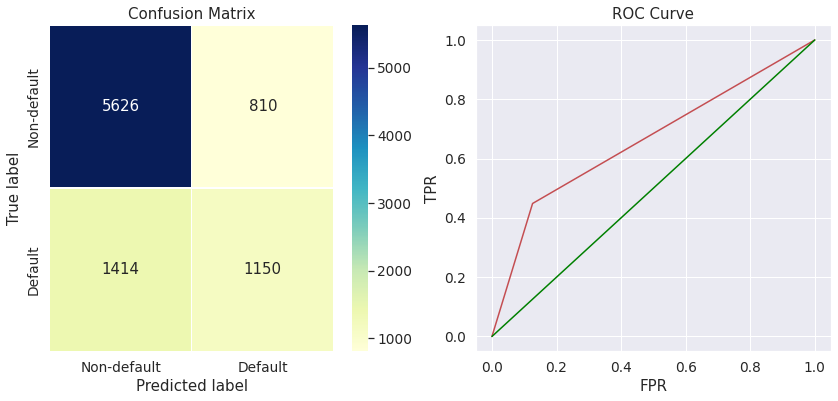

In [ ]:
# SMOTE
param_grid = {'max_depth': [20,30,50,100], 'min_samples_split':[0.1,0.2,0.4]}
dtc_sm = GridSearchCV(DecisionTreeClassifier(), param_grid = param_grid, cv=5, scoring = 'f1_weighted', verbose = 10)
dtc_sm = dtc_sm.fit(X_SMOTE, y_SMOTE)

print('Best Score: ',dtc_sm.best_score_)
print('Best Parameters: ',dtc_sm.best_params_)
Acc_mat_dtc_sm = test_report(dtc_sm,X_SMOTE,y_SMOTE,X_test,y_test)

#### SMOTEENN

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START max_depth=20, min_samples_split=0.1........................
[CV 1/5; 1/12] END max_depth=20, min_samples_split=0.1;, score=0.759 total time=   0.1s
[CV 2/5; 1/12] START max_depth=20, min_samples_split=0.1........................
[CV 2/5; 1/12] END max_depth=20, min_samples_split=0.1;, score=0.804 total time=   0.1s
[CV 3/5; 1/12] START max_depth=20, min_samples_split=0.1........................
[CV 3/5; 1/12] END max_depth=20, min_samples_split=0.1;, score=0.835 total time=   0.1s
[CV 4/5; 1/12] START max_depth=20, min_samples_split=0.1........................
[CV 4/5; 1/12] END max_depth=20, min_samples_split=0.1;, score=0.831 total time=   0.1s
[CV 5/5; 1/12] START max_depth=20, min_samples_split=0.1........................
[CV 5/5; 1/12] END max_depth=20, min_samples_split=0.1;, score=0.833 total time=   0.1s
[CV 1/5; 2/12] START max_depth=20, min_samples_split=0.2........................
[CV 1/5; 2/12

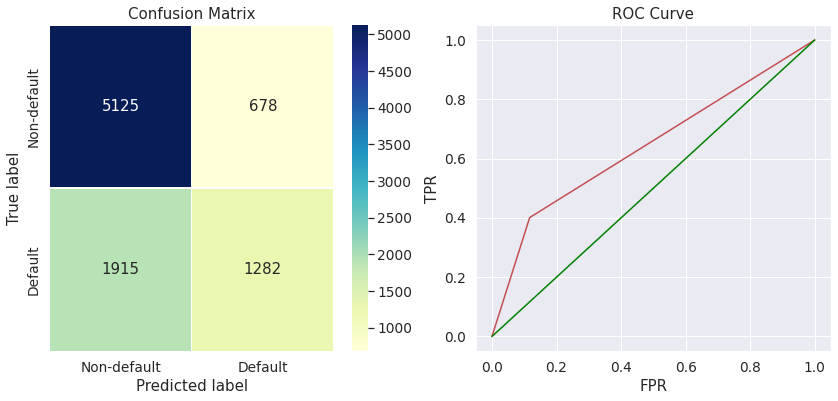

In [ ]:
# SMOTEENN X_train_under_over, y_train_under_over
param_grid = {'max_depth': [20,30,50,100], 'min_samples_split':[0.1,0.2,0.4]}
dtc_sm_nn = GridSearchCV(DecisionTreeClassifier(), param_grid = param_grid, cv=5, scoring = 'f1_weighted', verbose = 10)
dtc_sm_nn = dtc_sm_nn.fit(X_train_under_over, y_train_under_over)

print('Best Score: ',dtc_sm_nn.best_score_)
print('Best Parameters: ',dtc_sm_nn.best_params_)
Acc_mat_dtc_sm_nn = test_report(dtc_sm_nn,X_train_under_over, y_train_under_over,X_test,y_test)

#### Undersampling

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START max_depth=20, min_samples_split=0.1........................
[CV 1/5; 1/12] END max_depth=20, min_samples_split=0.1;, score=0.695 total time=   0.1s
[CV 2/5; 1/12] START max_depth=20, min_samples_split=0.1........................
[CV 2/5; 1/12] END max_depth=20, min_samples_split=0.1;, score=0.692 total time=   0.1s
[CV 3/5; 1/12] START max_depth=20, min_samples_split=0.1........................
[CV 3/5; 1/12] END max_depth=20, min_samples_split=0.1;, score=0.680 total time=   0.1s
[CV 4/5; 1/12] START max_depth=20, min_samples_split=0.1........................
[CV 4/5; 1/12] END max_depth=20, min_samples_split=0.1;, score=0.678 total time=   0.1s
[CV 5/5; 1/12] START max_depth=20, min_samples_split=0.1........................
[CV 5/5; 1/12] END max_depth=20, min_samples_split=0.1;, score=0.706 total time=   0.1s
[CV 1/5; 2/12] START max_depth=20, min_samples_split=0.2........................
[CV 1/5; 2/12

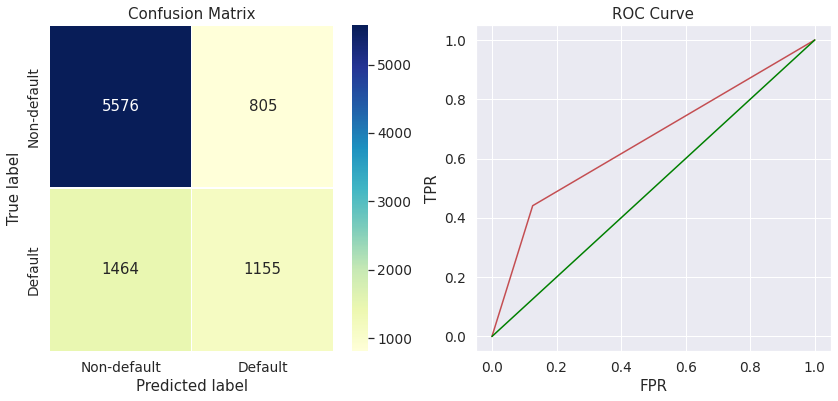

In [ ]:
# UNDER
param_grid = {'max_depth': [20,30,50,100], 'min_samples_split':[0.1,0.2,0.4]}
dtc_down = GridSearchCV(DecisionTreeClassifier(), param_grid = param_grid, cv=5, scoring = 'f1_weighted', verbose = 10)
dtc_down = dtc_down.fit(X_down, y_down)

print('Best Score: ',dtc_down.best_score_)
print('Best Parameters: ',dtc_down.best_params_)
Acc_mat_dtc_down = test_report(dtc_down,X_down, y_down,X_test,y_test)

#### ***Print

In [ ]:
#### Funzione per salvare CSV
header = ['Data Train', 'Best Score', 'Train accuracy', 'Test accuracy', 'Precision', 'Recall', 'F1 Score','Best Parameters']
dtc_data = [
    ['Standard',dtc.best_score_, Acc_mat_dtc['Train accuracy'], Acc_mat_dtc['Test accuracy'], Acc_mat_dtc['Precision'], Acc_mat_dtc['Recall'], Acc_mat_dtc['F1 Score'], dtc.best_params_],
    ['PCA',dtc_pca.best_score_, Acc_mat_dtc_pca['Train accuracy'], Acc_mat_dtc_pca['Test accuracy'], Acc_mat_dtc_pca['Precision'], Acc_mat_dtc_pca['Recall'], Acc_mat_dtc_pca['F1 Score'], dtc_pca.best_params_],
    ['SMOTE',dtc_sm.best_score_, Acc_mat_dtc_sm['Train accuracy'], Acc_mat_dtc_sm['Test accuracy'], Acc_mat_dtc_sm['Precision'], Acc_mat_dtc_sm['Recall'], Acc_mat_dtc_sm['F1 Score'], dtc_sm.best_params_],
    ['SMOTEENN',dtc_sm_nn.best_score_, Acc_mat_dtc_sm_nn['Train accuracy'], Acc_mat_dtc_sm_nn['Test accuracy'], Acc_mat_dtc_sm_nn['Precision'], Acc_mat_dtc_sm_nn['Recall'], Acc_mat_dtc_sm_nn['F1 Score'], dtc_sm_nn.best_params_],
    ['Undersampling',dtc_down.best_score_, Acc_mat_dtc_down['Train accuracy'], Acc_mat_dtc_down['Test accuracy'], Acc_mat_dtc_down['Precision'], Acc_mat_dtc_down['Recall'], Acc_mat_dtc_down['F1 Score'], dtc_down.best_params_],
]
with open('/content/drive/MyDrive/MML/Model/dtc.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerow(header)
    writer.writerows(dtc_data)

In [ ]:
#dtc_results = pd.read_csv("/content/drive/MyDrive/Polito/Magistrale/MML/Project_MML/model_result/dtc.csv")
dtc_results = pd.read_csv("/content/drive/MyDrive//MML/Model/dtc.csv")
dtc_results['Model'] = 'DTC'
res = dtc_results.iloc[[dtc_results['F1 Score'].idxmax()]]
best_results = pd.concat([best_results, res])
best_results

,Data Train,Best Score,Train accuracy,Test accuracy,Precision,Recall,F1 Score,Best Parameters,Model
4,Undersampling,0.606267,0.999465,0.561222,0.291902,0.711735,0.414008,"{'n_neighbors': 75, 'weights': 'distance'}",KNN
2,SMOTE,0.799537,0.806879,0.752889,0.448518,0.586735,0.508400,"{'max_depth': 20, 'min_samples_split': 0.1}",DTC


<Figure size 720x360 with 0 Axes>

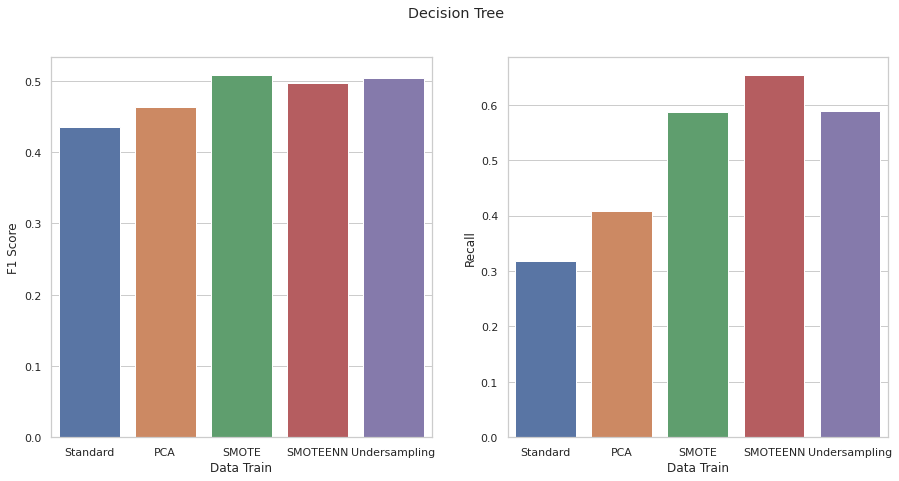

In [ ]:
plt.figure(figsize=(10,5))
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,7))
fig.suptitle('Decision Tree')

plt.subplot(121)
sns.barplot(data=dtc_results, x='Data Train', y='F1 Score')

plt.subplot(122)
sns.barplot(data=dtc_results, x='Data Train', y='Recall')

### RANDOM FOREST

Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction.
The prerequisites for random forest to perform well are: 
There needs to be some actual signal in our features so that models built using those features do better than random guessing. 
The predictions (and therefore the errors) made by the individual trees need to have low correlations with each other.

[https://towardsdatascience.com/from-a-single-decision-tree-to-a-random-forest-b9523be65147](https://towardsdatascience.com/from-a-single-decision-tree-to-a-random-forest-b9523be65147)

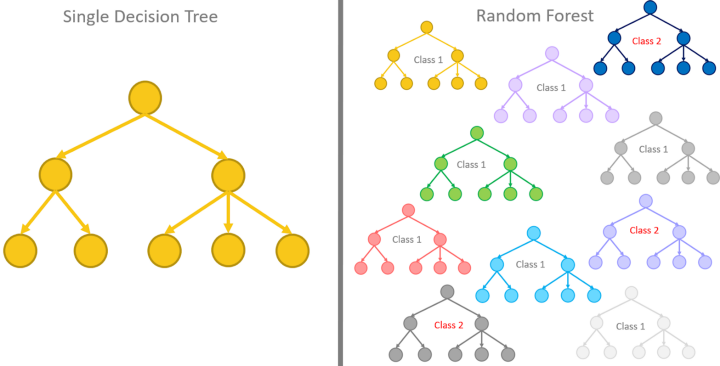

#### Standard RF

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START criterion=gini, max_features=sqrt, n_estimators=80.........
[CV 1/5; 1/12] END criterion=gini, max_features=sqrt, n_estimators=80;, score=0.793 total time=   3.0s
[CV 2/5; 1/12] START criterion=gini, max_features=sqrt, n_estimators=80.........
[CV 2/5; 1/12] END criterion=gini, max_features=sqrt, n_estimators=80;, score=0.798 total time=   2.9s
[CV 3/5; 1/12] START criterion=gini, max_features=sqrt, n_estimators=80.........
[CV 3/5; 1/12] END criterion=gini, max_features=sqrt, n_estimators=80;, score=0.798 total time=   2.9s
[CV 4/5; 1/12] START criterion=gini, max_features=sqrt, n_estimators=80.........
[CV 4/5; 1/12] END criterion=gini, max_features=sqrt, n_estimators=80;, score=0.797 total time=   2.9s
[CV 5/5; 1/12] START criterion=gini, max_features=sqrt, n_estimators=80.........
[CV 5/5; 1/12] END criterion=gini, max_features=sqrt, n_estimators=80;, score=0.789 total time=   2.9s
[CV 1/5; 2/12] STAR

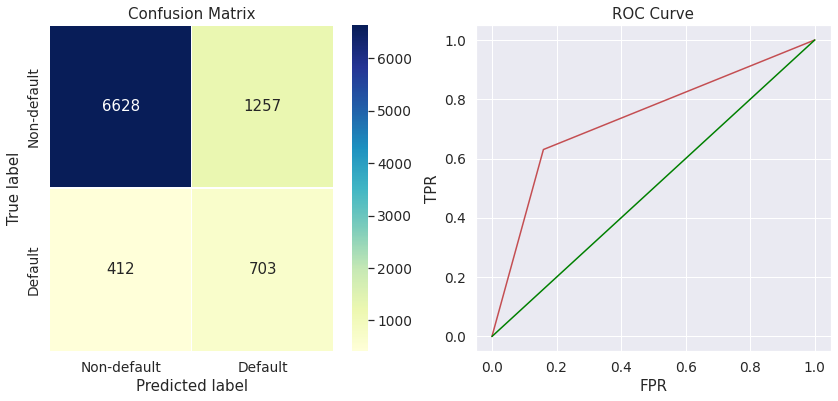

In [ ]:
# normale

param_grid = {"n_estimators":[80,100,120], "criterion":["gini", "entropy"], "max_features":['sqrt','log2'],}
rfc = GridSearchCV(RandomForestClassifier(), param_grid = param_grid, cv=5, scoring = 'f1_weighted', verbose = 10)
rfc = rfc.fit(X_train, y_train)

print('Best Score: ',rfc.best_score_)
print('Best Parameters: ',rfc.best_params_)
Acc_mat_rfc = test_report(rfc,X_train,y_train,X_test,y_test)

#### PCA

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3; 1/12] START criterion=gini, max_features=sqrt, n_estimators=80.........
[CV 1/3; 1/12] END criterion=gini, max_features=sqrt, n_estimators=80;, score=0.779 total time=   4.9s
[CV 2/3; 1/12] START criterion=gini, max_features=sqrt, n_estimators=80.........
[CV 2/3; 1/12] END criterion=gini, max_features=sqrt, n_estimators=80;, score=0.774 total time=   5.1s
[CV 3/3; 1/12] START criterion=gini, max_features=sqrt, n_estimators=80.........
[CV 3/3; 1/12] END criterion=gini, max_features=sqrt, n_estimators=80;, score=0.779 total time=   5.1s
[CV 1/3; 2/12] START criterion=gini, max_features=sqrt, n_estimators=100........
[CV 1/3; 2/12] END criterion=gini, max_features=sqrt, n_estimators=100;, score=0.785 total time=   6.2s
[CV 2/3; 2/12] START criterion=gini, max_features=sqrt, n_estimators=100........
[CV 2/3; 2/12] END criterion=gini, max_features=sqrt, n_estimators=100;, score=0.776 total time=   6.3s
[CV 3/3; 2/12] ST

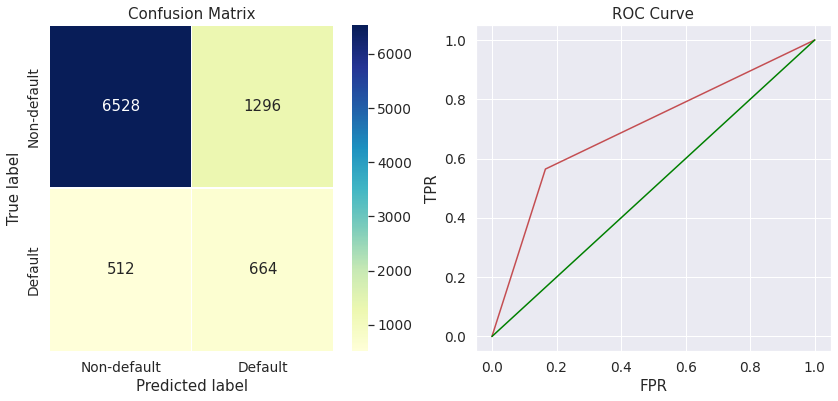

In [ ]:
# PCA
param_grid = {"n_estimators":[80,100,120], "criterion":["gini", "entropy"], "max_features":['sqrt','log2']}
rfc_pca = GridSearchCV(RandomForestClassifier(), param_grid = param_grid, cv=3, scoring = 'f1_weighted', verbose= 10)
rfc_pca = rfc_pca.fit(X_train_pca, y_train)

print('Best Score: ', rfc_pca.best_score_)
print('Best Parameters: ', rfc_pca.best_params_)
Acc_mat_rfc_pca = test_report( rfc_pca,X_train_pca,y_train,X_test_pca,y_test)

#### SMOTE

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3; 1/12] START criterion=gini, max_features=sqrt, n_estimators=80.........
[CV 1/3; 1/12] END criterion=gini, max_features=sqrt, n_estimators=80;, score=0.563 total time=   2.6s
[CV 2/3; 1/12] START criterion=gini, max_features=sqrt, n_estimators=80.........
[CV 2/3; 1/12] END criterion=gini, max_features=sqrt, n_estimators=80;, score=0.937 total time=   3.2s
[CV 3/3; 1/12] START criterion=gini, max_features=sqrt, n_estimators=80.........
[CV 3/3; 1/12] END criterion=gini, max_features=sqrt, n_estimators=80;, score=0.928 total time=   3.3s
[CV 1/3; 2/12] START criterion=gini, max_features=sqrt, n_estimators=100........
[CV 1/3; 2/12] END criterion=gini, max_features=sqrt, n_estimators=100;, score=0.570 total time=   3.2s
[CV 2/3; 2/12] START criterion=gini, max_features=sqrt, n_estimators=100........
[CV 2/3; 2/12] END criterion=gini, max_features=sqrt, n_estimators=100;, score=0.938 total time=   4.1s
[CV 3/3; 2/12] ST

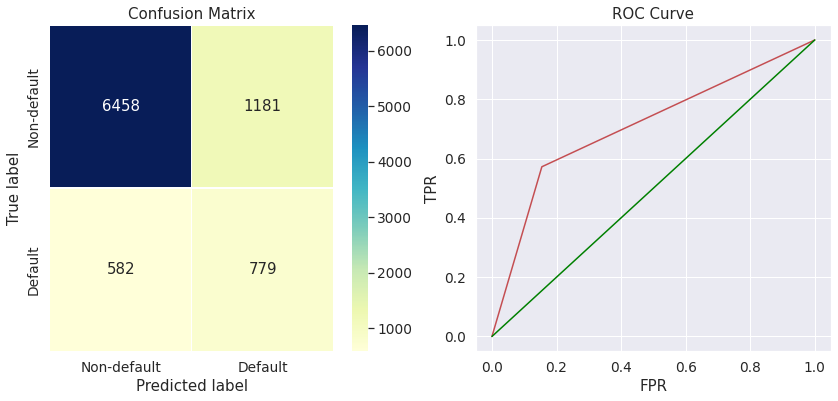

In [ ]:
# SMOTE
param_grid = {"n_estimators":[80,100,120], "criterion":["gini", "entropy"], "max_features":['sqrt','log2']}
rfc_sm = GridSearchCV(RandomForestClassifier(), param_grid = param_grid, cv=3, scoring = 'f1_weighted', verbose= 10)
rfc_sm = rfc_sm.fit(X_SMOTE, y_SMOTE)

print('Best Score: ', rfc_sm.best_score_)
print('Best Parameters: ', rfc_sm.best_params_)
Acc_mat_rfc_sm = test_report( rfc_sm,X_SMOTE,y_SMOTE,X_test,y_test)

#### SMOTEEN

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3; 1/12] START criterion=gini, max_features=sqrt, n_estimators=80.........
[CV 1/3; 1/12] END criterion=gini, max_features=sqrt, n_estimators=80;, score=0.728 total time=   1.3s
[CV 2/3; 1/12] START criterion=gini, max_features=sqrt, n_estimators=80.........
[CV 2/3; 1/12] END criterion=gini, max_features=sqrt, n_estimators=80;, score=0.941 total time=   1.5s
[CV 3/3; 1/12] START criterion=gini, max_features=sqrt, n_estimators=80.........
[CV 3/3; 1/12] END criterion=gini, max_features=sqrt, n_estimators=80;, score=0.943 total time=   1.5s
[CV 1/3; 2/12] START criterion=gini, max_features=sqrt, n_estimators=100........
[CV 1/3; 2/12] END criterion=gini, max_features=sqrt, n_estimators=100;, score=0.724 total time=   1.7s
[CV 2/3; 2/12] START criterion=gini, max_features=sqrt, n_estimators=100........
[CV 2/3; 2/12] END criterion=gini, max_features=sqrt, n_estimators=100;, score=0.940 total time=   1.9s
[CV 3/3; 2/12] ST

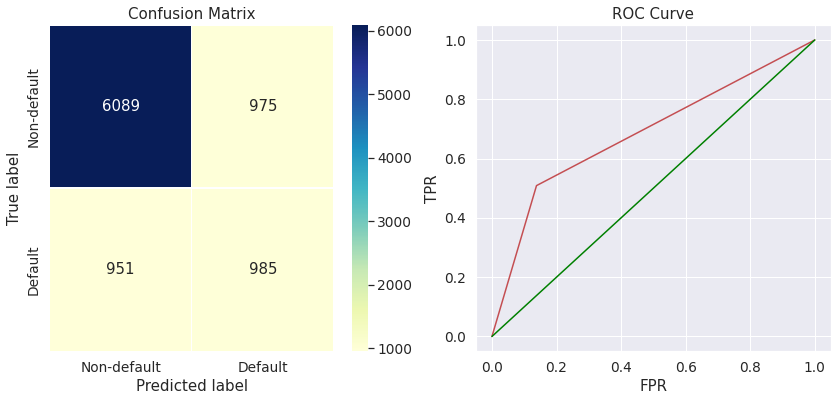

In [ ]:
# SMOTEENN X_train_under_over, y_train_under_over
param_grid = {"n_estimators":[80,100,120], "criterion":["gini", "entropy"], "max_features":['sqrt','log2']}
rfc_sm_nn = GridSearchCV(RandomForestClassifier(), param_grid = param_grid, cv=3, scoring = 'f1_weighted', verbose= 10)
rfc_sm_nn = rfc_sm_nn.fit(X_train_under_over, y_train_under_over)

print('Best Score: ', rfc_sm_nn.best_score_)
print('Best Parameters: ', rfc_sm_nn.best_params_)
Acc_mat_rfc_sm_nn = test_report( rfc_sm_nn,X_train_under_over, y_train_under_over,X_test,y_test)

#### Undersampling

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3; 1/12] START criterion=gini, max_features=sqrt, n_estimators=80.........
[CV 1/3; 1/12] END criterion=gini, max_features=sqrt, n_estimators=80;, score=0.709 total time=   1.0s
[CV 2/3; 1/12] START criterion=gini, max_features=sqrt, n_estimators=80.........
[CV 2/3; 1/12] END criterion=gini, max_features=sqrt, n_estimators=80;, score=0.691 total time=   1.1s
[CV 3/3; 1/12] START criterion=gini, max_features=sqrt, n_estimators=80.........
[CV 3/3; 1/12] END criterion=gini, max_features=sqrt, n_estimators=80;, score=0.699 total time=   1.1s
[CV 1/3; 2/12] START criterion=gini, max_features=sqrt, n_estimators=100........
[CV 1/3; 2/12] END criterion=gini, max_features=sqrt, n_estimators=100;, score=0.708 total time=   1.3s
[CV 2/3; 2/12] START criterion=gini, max_features=sqrt, n_estimators=100........
[CV 2/3; 2/12] END criterion=gini, max_features=sqrt, n_estimators=100;, score=0.697 total time=   1.3s
[CV 3/3; 2/12] ST

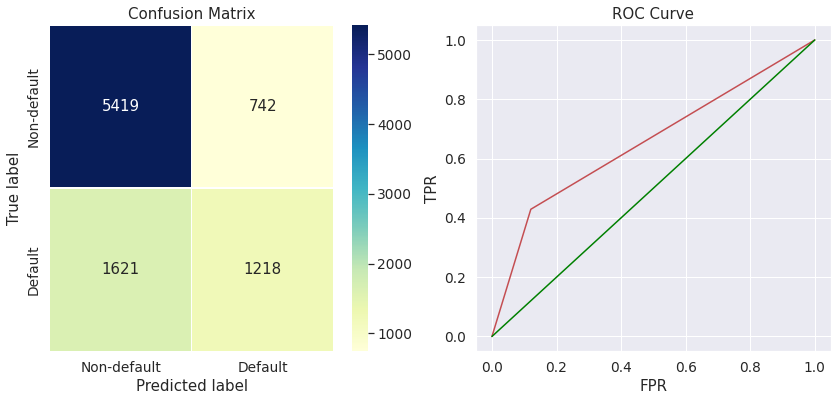

In [ ]:
# UNDER
param_grid = {"n_estimators":[80,100,120], "criterion":["gini", "entropy"], "max_features":['sqrt','log2']}
rfc_down = GridSearchCV(RandomForestClassifier(), param_grid = param_grid, cv=3, scoring = 'f1_weighted', verbose= 10)
rfc_down = rfc_down.fit(X_down, y_down)

print('Best Score: ',rfc_down.best_score_)
print('Best Parameters: ',rfc_down.best_params_)
Acc_mat_rfc_down = test_report(rfc_down,X_down,y_down,X_test,y_test)

#### ***Print

In [ ]:
#### Funzione per salvare CSV

header = ['Data Train', 'Best Score', 'Train accuracy', 'Test accuracy', 'Precision', 'Recall', 'F1 Score','Best Parameters']
rfc_data = [
    ['Standard',rfc.best_score_, Acc_mat_rfc['Train accuracy'], Acc_mat_rfc['Test accuracy'], Acc_mat_rfc['Precision'], Acc_mat_rfc['Recall'], Acc_mat_rfc['F1 Score'], rfc.best_params_],
    ['PCA',rfc_pca.best_score_, Acc_mat_rfc_pca['Train accuracy'], Acc_mat_rfc_pca['Test accuracy'], Acc_mat_rfc_pca['Precision'], Acc_mat_rfc_pca['Recall'], Acc_mat_rfc_pca['F1 Score'], rfc_pca.best_params_],
    ['SMOTE',rfc_sm.best_score_, Acc_mat_rfc_sm['Train accuracy'], Acc_mat_rfc_sm['Test accuracy'], Acc_mat_rfc_sm['Precision'], Acc_mat_rfc_sm['Recall'], Acc_mat_rfc_sm['F1 Score'], rfc_sm.best_params_],
    ['SMOTEENN',rfc_sm_nn.best_score_, Acc_mat_rfc_sm_nn['Train accuracy'], Acc_mat_rfc_sm_nn['Test accuracy'], Acc_mat_rfc_sm_nn['Precision'], Acc_mat_rfc_sm_nn['Recall'], Acc_mat_rfc_sm_nn['F1 Score'], rfc_sm_nn.best_params_],
    ['Undersampling',rfc_down.best_score_, Acc_mat_rfc_down['Train accuracy'], Acc_mat_rfc_down['Test accuracy'], Acc_mat_rfc_down['Precision'], Acc_mat_rfc_down['Recall'], Acc_mat_rfc_down['F1 Score'], rfc_down.best_params_],
]
with open('/content/drive/MyDrive/MML/Model/rfc.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerow(header)
    writer.writerows(rfc_data)

In [ ]:
#rfc_results = pd.read_csv("/content/drive/MyDrive/Polito/Magistrale/MML/Project_MML/model_result/rfc.csv")
rfc_results = pd.read_csv("/content/drive/MyDrive//MML/Model/rfc.csv")
rfc_results['Model'] = 'RFC'
res = rfc_results.iloc[[rfc_results['F1 Score'].idxmax()]]
best_results = pd.concat([best_results, res])
best_results

,Data Train,Best Score,Train accuracy,Test accuracy,Precision,Recall,F1 Score,Best Parameters,Model
4,Undersampling,0.606267,0.999465,0.561222,0.291902,0.711735,0.414008,"{'n_neighbors': 75, 'weights': 'distance'}",KNN
2,SMOTE,0.799537,0.806879,0.752889,0.448518,0.586735,0.508400,"{'max_depth': 20, 'min_samples_split': 0.1}",DTC
4,Undersampling,0.705325,0.999465,0.737444,0.429024,0.621429,0.507606,"{'criterion': 'entropy', 'max_features': 'sqrt...",RFC


<Figure size 720x360 with 0 Axes>

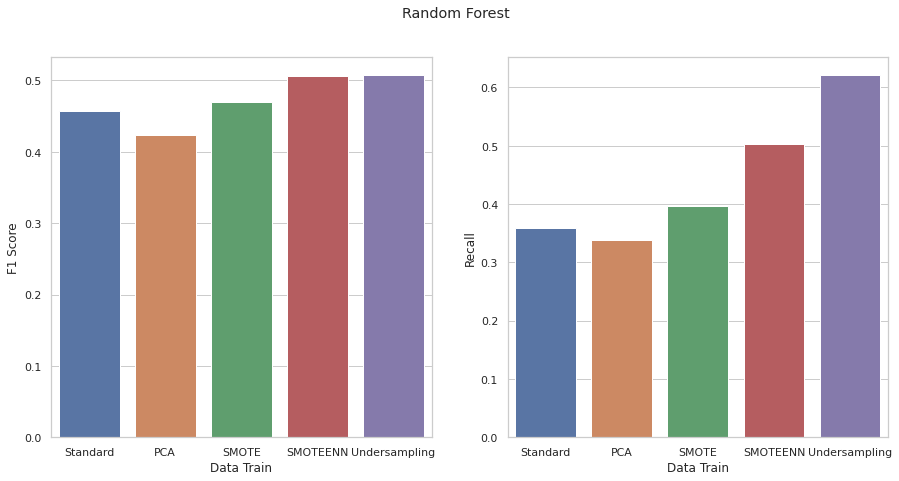

In [ ]:
plt.figure(figsize=(10,5))
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,7))
fig.suptitle('Random Forest')

plt.subplot(121)
sns.barplot(data=rfc_results, x='Data Train', y='F1 Score')

plt.subplot(122)
sns.barplot(data=rfc_results, x='Data Train', y='Recall')

### SVM

The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.
Hyperplanes are decision boundaries that help classify the data points. Data points falling on either side of the hyperplane can be attributed to different classes. Also, the dimension of the hyperplane depends upon the number of features. 
Support vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maximize the margin of the classifier. Deleting the support vectors will change the position of the hyperplane. These are the points that help us build our SVM.

[https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47](https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47)

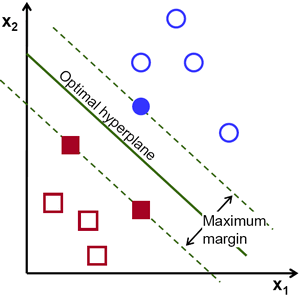

#### Standard SVM

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3; 1/12] START C=0.1, gamma=scale, kernel=rbf.............................
[CV 1/3; 1/12] END C=0.1, gamma=scale, kernel=rbf;, score=0.680 total time=  21.9s
[CV 2/3; 1/12] START C=0.1, gamma=scale, kernel=rbf.............................
[CV 2/3; 1/12] END C=0.1, gamma=scale, kernel=rbf;, score=0.680 total time=  20.3s
[CV 3/3; 1/12] START C=0.1, gamma=scale, kernel=rbf.............................
[CV 3/3; 1/12] END C=0.1, gamma=scale, kernel=rbf;, score=0.680 total time=  12.2s
[CV 1/3; 2/12] START C=0.1, gamma=auto, kernel=rbf..............................
[CV 1/3; 2/12] END C=0.1, gamma=auto, kernel=rbf;, score=0.680 total time= 1.1min
[CV 2/3; 2/12] START C=0.1, gamma=auto, kernel=rbf..............................
[CV 2/3; 2/12] END C=0.1, gamma=auto, kernel=rbf;, score=0.680 total time=  44.4s
[CV 3/3; 2/12] START C=0.1, gamma=auto, kernel=rbf..............................
[CV 3/3; 2/12] END C=0.1, gamma=auto, ke

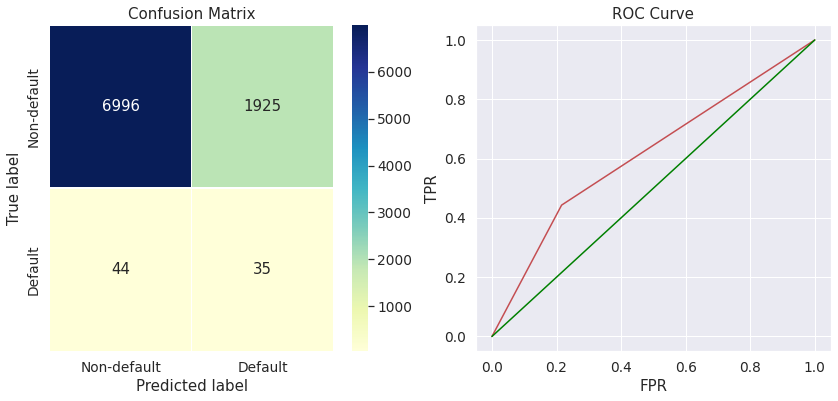

In [ ]:
# normale

param_grid = {'C': [0.1, 1, 1.5, 2, 10, 20], 'kernel': ['rbf'], 'gamma' :['scale', 'auto']}
svc = GridSearchCV(SVC(), param_grid = param_grid, cv=3, scoring = 'f1_weighted', verbose= 10)
svc = svc.fit(X_train, y_train)

print('Best Score: ',svc.best_score_)
print('Best Parameters: ',svc.best_params_)
Acc_mat_svc = test_report(svc,X_train,y_train,X_test,y_test)

In [ ]:
#### Funzione per salvare CSV

header = ['Data Train', 'Best Score', 'Train accuracy', 'Test accuracy', 'Precision', 'Recall', 'F1 Score','Best Parameters']
svc_data = [
    ['Standard',svc.best_score_, Acc_mat_svc['Train accuracy'], Acc_mat_svc['Test accuracy'], Acc_mat_svc['Precision'], Acc_mat_svc['Recall'], Acc_mat_svc['F1 Score'], svc.best_params_]
]
with open('/content/drive/MyDrive/MML/Model/svc_std.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerow(header)
    writer.writerow(svc_data)

#### PCA

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3; 1/24] START C=0.1, gamma=scale, kernel=rbf.............................
[CV 1/3; 1/24] END C=0.1, gamma=scale, kernel=rbf;, score=0.774 total time=  12.1s
[CV 2/3; 1/24] START C=0.1, gamma=scale, kernel=rbf.............................
[CV 2/3; 1/24] END C=0.1, gamma=scale, kernel=rbf;, score=0.766 total time=  12.1s
[CV 3/3; 1/24] START C=0.1, gamma=scale, kernel=rbf.............................
[CV 3/3; 1/24] END C=0.1, gamma=scale, kernel=rbf;, score=0.770 total time=  12.2s
[CV 1/3; 2/24] START C=0.1, gamma=scale, kernel=linear..........................
[CV 1/3; 2/24] END C=0.1, gamma=scale, kernel=linear;, score=0.791 total time=   9.9s
[CV 2/3; 2/24] START C=0.1, gamma=scale, kernel=linear..........................
[CV 2/3; 2/24] END C=0.1, gamma=scale, kernel=linear;, score=0.783 total time=   9.3s
[CV 3/3; 2/24] START C=0.1, gamma=scale, kernel=linear..........................
[CV 3/3; 2/24] END C=0.1, gamma=

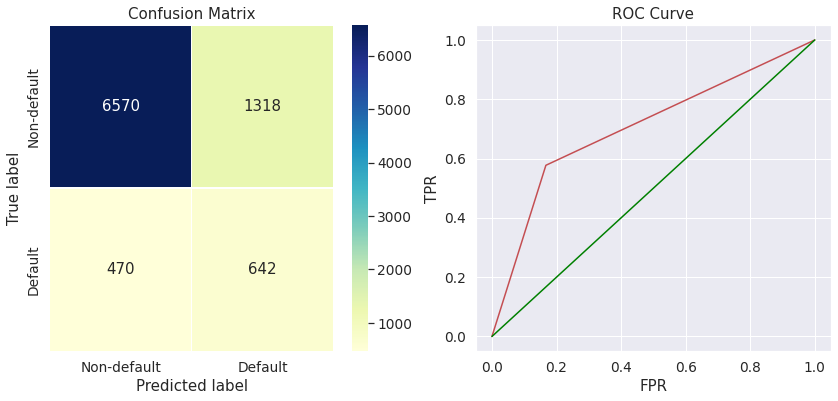

In [ ]:
# PCA
param_grid = {'C': [0.1, 1, 1.5, 2, 10, 20], 'kernel': ['rbf', 'linear'], 'gamma' :['scale', 'auto']}
svc_pca = GridSearchCV(SVC(), param_grid = param_grid, cv=3, scoring = 'f1_weighted', verbose= 10)
svc_pca = svc_pca.fit(X_train_pca, y_train)

print('Best Score: ',svc_pca.best_score_)
print('Best Parameters: ',svc_pca.best_params_)
Acc_mat_svc_pca = test_report(svc_pca,X_train_pca,y_train,X_test_pca,y_test)

In [ ]:
#### Funzione per salvare CSV

header = ['Data Train', 'Best Score', 'Train accuracy', 'Test accuracy', 'Precision', 'Recall', 'F1 Score','Best Parameters']
svc_data = [
    ['PCA',svc_pca.best_score_, Acc_mat_svc_pca['Train accuracy'], Acc_mat_svc_pca['Test accuracy'], Acc_mat_svc_pca['Precision'], Acc_mat_svc_pca['Recall'], Acc_mat_svc_pca['F1 Score'], svc_pca.best_params_],
]
with open('/content/drive/MyDrive/MML/Model/svc_pca.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerow(header)
    writer.writerow(svc_data)

#### SMOTE

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3; 1/12] START C=0.1, gamma=scale, kernel=rbf.............................
[CV 1/3; 1/12] END C=0.1, gamma=scale, kernel=rbf;, score=0.603 total time= 1.4min
[CV 2/3; 1/12] START C=0.1, gamma=scale, kernel=rbf.............................
[CV 2/3; 1/12] END C=0.1, gamma=scale, kernel=rbf;, score=0.607 total time= 1.7min
[CV 3/3; 1/12] START C=0.1, gamma=scale, kernel=rbf.............................
[CV 3/3; 1/12] END C=0.1, gamma=scale, kernel=rbf;, score=0.603 total time= 1.3min
[CV 1/3; 2/12] START C=0.1, gamma=auto, kernel=rbf..............................
[CV 1/3; 2/12] END C=0.1, gamma=auto, kernel=rbf;, score=0.351 total time=  44.4s
[CV 2/3; 2/12] START C=0.1, gamma=auto, kernel=rbf..............................
[CV 2/3; 2/12] END C=0.1, gamma=auto, kernel=rbf;, score=0.349 total time=  48.5s
[CV 3/3; 2/12] START C=0.1, gamma=auto, kernel=rbf..............................
[CV 3/3; 2/12] END C=0.1, gamma=auto, ke

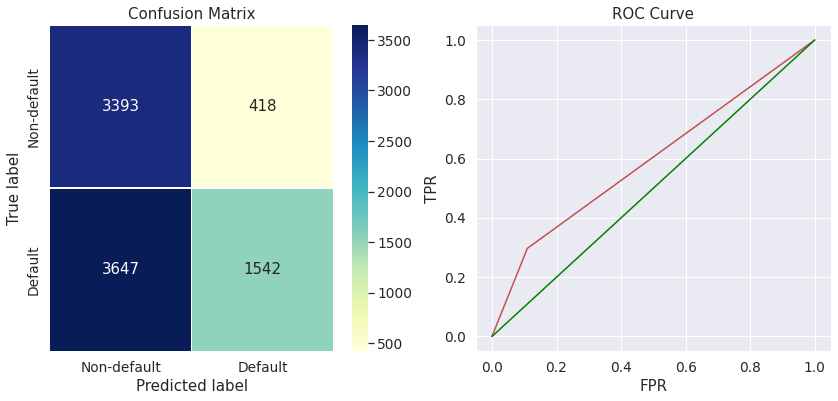

In [ ]:
# SMOTE

param_grid = {'C': [0.1, 1, 1.5, 2, 10, 20], 'kernel': ['rbf'], 'gamma' :['scale', 'auto']}
svc_sm = GridSearchCV(SVC(), param_grid = param_grid, cv=3, scoring = 'f1_weighted', verbose= 10)
svc_sm = svc_sm.fit(X_SMOTE, y_SMOTE)

print('Best Score: ',svc_sm.best_score_)
print('Best Parameters: ',svc_sm.best_params_)
Acc_mat_svc_sm = test_report(svc_sm,X_SMOTE,y_SMOTE,X_test,y_test)

In [ ]:
#### Funzione per salvare CSV

header = ['Data Train', 'Best Score', 'Train accuracy', 'Test accuracy', 'Precision', 'Recall', 'F1 Score','Best Parameters']
svc_data = [
    ['SMOTE',svc_sm.best_score_, Acc_mat_svc_sm['Train accuracy'], Acc_mat_svc_sm['Test accuracy'], Acc_mat_svc_sm['Precision'], Acc_mat_svc_sm['Recall'], Acc_mat_svc_sm['F1 Score'], svc_sm.best_params_],
]
with open('/content/drive/MyDrive/MML/Model/svc_smote.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerow(header)
    writer.writerow(svc_data)

#### SMOTEENN

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3; 1/12] START C=0.1, gamma=scale, kernel=rbf.............................
[CV 1/3; 1/12] END C=0.1, gamma=scale, kernel=rbf;, score=0.691 total time=   9.3s
[CV 2/3; 1/12] START C=0.1, gamma=scale, kernel=rbf.............................
[CV 2/3; 1/12] END C=0.1, gamma=scale, kernel=rbf;, score=0.693 total time=   9.6s
[CV 3/3; 1/12] START C=0.1, gamma=scale, kernel=rbf.............................
[CV 3/3; 1/12] END C=0.1, gamma=scale, kernel=rbf;, score=0.682 total time=  10.8s
[CV 1/3; 2/12] START C=0.1, gamma=auto, kernel=rbf..............................
[CV 1/3; 2/12] END C=0.1, gamma=auto, kernel=rbf;, score=0.350 total time=   9.3s
[CV 2/3; 2/12] START C=0.1, gamma=auto, kernel=rbf..............................
[CV 2/3; 2/12] END C=0.1, gamma=auto, kernel=rbf;, score=0.353 total time=   9.4s
[CV 3/3; 2/12] START C=0.1, gamma=auto, kernel=rbf..............................
[CV 3/3; 2/12] END C=0.1, gamma=auto, ke

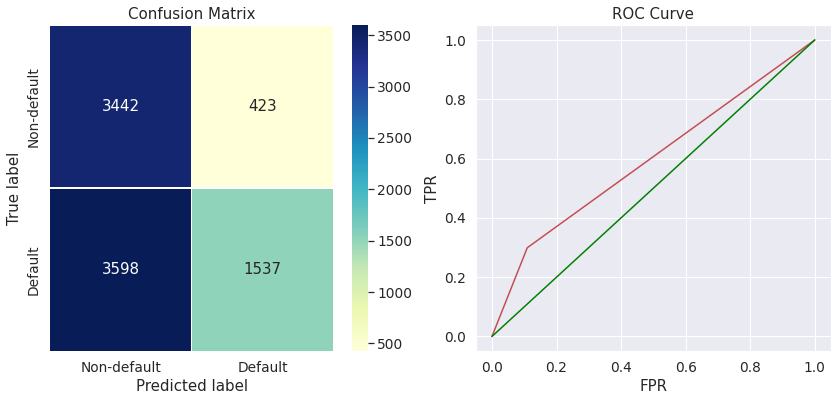

In [ ]:
# SMOTEENN X_train_under_over, y_train_under_over
param_grid = {'C': [0.1, 1, 1.5, 2, 10, 20], 'kernel': ['rbf'], 'gamma' :['scale', 'auto']}
svc_sm_nn = GridSearchCV(SVC(), param_grid = param_grid, cv=3, scoring = 'f1_weighted', verbose= 10)
svc_sm_nn = svc_sm_nn.fit(X_train_under_over, y_train_under_over)

print('Best Score: ',svc_sm_nn.best_score_)
print('Best Parameters: ',svc_sm_nn.best_params_)
Acc_mat_svc_sm_nn = test_report(svc_sm_nn,X_train_under_over, y_train_under_over,X_test,y_test)

In [ ]:
#### Funzione per salvare CSV

header = ['Data Train', 'Best Score', 'Train accuracy', 'Test accuracy', 'Precision', 'Recall', 'F1 Score','Best Parameters']
svc_data = [
    ['SMOTEENN',svc_sm_nn.best_score_, Acc_mat_svc_sm_nn['Train accuracy'], Acc_mat_svc_sm_nn['Test accuracy'], Acc_mat_svc_sm_nn['Precision'], Acc_mat_svc_sm_nn['Recall'], Acc_mat_svc_sm_nn['F1 Score'], svc_sm_nn.best_params_],
]
with open('/content/drive/MyDrive/MML/Model/svc_smoteen.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerow(header)
    writer.writerow(svc_data)

#### Undersampling

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3; 1/12] START C=0.1, gamma=scale, kernel=rbf.............................
[CV 1/3; 1/12] END C=0.1, gamma=scale, kernel=rbf;, score=0.592 total time=   5.9s
[CV 2/3; 1/12] START C=0.1, gamma=scale, kernel=rbf.............................
[CV 2/3; 1/12] END C=0.1, gamma=scale, kernel=rbf;, score=0.583 total time=   5.6s
[CV 3/3; 1/12] START C=0.1, gamma=scale, kernel=rbf.............................
[CV 3/3; 1/12] END C=0.1, gamma=scale, kernel=rbf;, score=0.608 total time=   4.5s
[CV 1/3; 2/12] START C=0.1, gamma=auto, kernel=rbf..............................
[CV 1/3; 2/12] END C=0.1, gamma=auto, kernel=rbf;, score=0.340 total time=   3.6s
[CV 2/3; 2/12] START C=0.1, gamma=auto, kernel=rbf..............................
[CV 2/3; 2/12] END C=0.1, gamma=auto, kernel=rbf;, score=0.334 total time=   3.5s
[CV 3/3; 2/12] START C=0.1, gamma=auto, kernel=rbf..............................
[CV 3/3; 2/12] END C=0.1, gamma=auto, ke

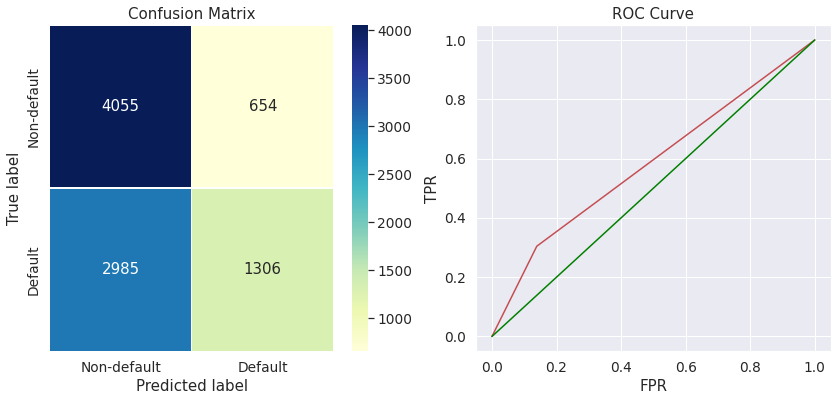

In [ ]:
# UNDER

param_grid = {'C': [0.1, 1, 1.5, 2, 10, 20], 'kernel': ['rbf'], 'gamma' :['scale', 'auto']}
svc_down = GridSearchCV(SVC(), param_grid = param_grid, cv=3, scoring = 'f1_weighted', verbose= 10)
svc_down = svc_down.fit(X_down, y_down)

print('Best Score: ',svc_down.best_score_)
print('Best Parameters: ',svc_down.best_params_)
Acc_mat_svc_down = test_report(svc_down,X_down,y_down,X_test,y_test)

In [ ]:
#### Funzione per salvare CSV

header = ['Data Train', 'Best Score', 'Train accuracy', 'Test accuracy', 'Precision', 'Recall', 'F1 Score','Best Parameters']
svc_data = [
    ['Undersampling',svc_down.best_score_, Acc_mat_svc_down['Train accuracy'], Acc_mat_svc_down['Test accuracy'], Acc_mat_svc_down['Precision'], Acc_mat_svc_down['Recall'], Acc_mat_svc_down['F1 Score'], svc_down.best_params_],
]
with open('/content/drive/MyDrive/MML/Model/svc_under.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerow(header)
    writer.writerow(svc_data)

#### ***Print

In [ ]:
#### Funzione per salvare CSV

header = ['Data Train', 'Best Score', 'Train accuracy', 'Test accuracy', 'Precision', 'Recall', 'F1 Score','Best Parameters']
svc_data = [
    ['Standard',svc.best_score_, Acc_mat_svc['Train accuracy'], Acc_mat_svc['Test accuracy'], Acc_mat_svc['Precision'], Acc_mat_svc['Recall'], Acc_mat_svc['F1 Score'], svc.best_params_],
    ['PCA',svc_pca.best_score_, Acc_mat_svc_pca['Train accuracy'], Acc_mat_svc_pca['Test accuracy'], Acc_mat_svc_pca['Precision'], Acc_mat_svc_pca['Recall'], Acc_mat_svc_pca['F1 Score'], svc_pca.best_params_],
    ['SMOTE',svc_sm.best_score_, Acc_mat_svc_sm['Train accuracy'], Acc_mat_svc_sm['Test accuracy'], Acc_mat_svc_sm['Precision'], Acc_mat_svc_sm['Recall'], Acc_mat_svc_sm['F1 Score'], svc_sm.best_params_],
    ['SMOTEENN',svc_sm_nn.best_score_, Acc_mat_svc_sm_nn['Train accuracy'], Acc_mat_svc_sm_nn['Test accuracy'], Acc_mat_svc_sm_nn['Precision'], Acc_mat_svc_sm_nn['Recall'], Acc_mat_svc_sm_nn['F1 Score'], svc_sm_nn.best_params_],
    ['Undersampling',svc_down.best_score_, Acc_mat_svc_down['Train accuracy'], Acc_mat_svc_down['Test accuracy'], Acc_mat_svc_down['Precision'], Acc_mat_svc_down['Recall'], Acc_mat_svc_down['F1 Score'], svc_down.best_params_],
]
with open('/content/drive/MyDrive/MML/Model/svc.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerow(header)
    writer.writerows(svc_data)

In [ ]:
#svm_results = pd.read_csv("/content/drive/MyDrive/Polito/Magistrale/MML/Project_MML/model_result/svc.csv")
svm_results = pd.read_csv("/content/drive/MyDrive//MML/Model/svc.csv")
svm_results['Model'] = 'SVM'
res = svm_results.iloc[[svm_results['F1 Score'].idxmax()]]
best_results = pd.concat([best_results, res])
best_results

,Data Train,Best Score,Train accuracy,Test accuracy,Precision,Recall,F1 Score,Best Parameters,Model
4,Undersampling,0.606267,0.999465,0.561222,0.291902,0.711735,0.414008,"{'n_neighbors': 75, 'weights': 'distance'}",KNN
2,SMOTE,0.799537,0.806879,0.752889,0.448518,0.586735,0.508400,"{'max_depth': 20, 'min_samples_split': 0.1}",DTC
4,Undersampling,0.705325,0.999465,0.737444,0.429024,0.621429,0.507606,"{'criterion': 'entropy', 'max_features': 'sqrt...",RFC
3,SMOTEENN,0.752501,0.764966,0.553222,0.299318,0.784184,0.433263,"{'C': 20, 'gamma': 'scale', 'kernel': 'rbf'}",SVM


<Figure size 720x360 with 0 Axes>

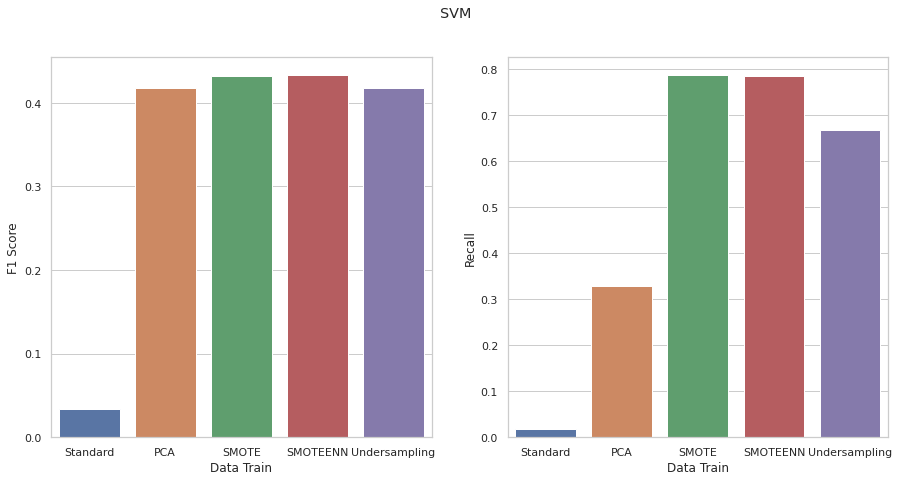

In [ ]:
plt.figure(figsize=(10,5))
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,7))
fig.suptitle('SVM')

plt.subplot(121)
sns.barplot(data=svm_results, x='Data Train', y='F1 Score')

plt.subplot(122)
sns.barplot(data=svm_results, x='Data Train', y='Recall')

## BEST MODEL

In [ ]:
best_results

,Data Train,Best Score,Train accuracy,Test accuracy,Precision,Recall,F1 Score,Best Parameters,Model
4,Undersampling,0.606267,0.999465,0.561222,0.291902,0.711735,0.414008,"{'n_neighbors': 75, 'weights': 'distance'}",KNN
2,SMOTE,0.799537,0.806879,0.752889,0.448518,0.586735,0.508400,"{'max_depth': 20, 'min_samples_split': 0.1}",DTC
4,Undersampling,0.705325,0.999465,0.737444,0.429024,0.621429,0.507606,"{'criterion': 'entropy', 'max_features': 'sqrt...",RFC
3,SMOTEENN,0.752501,0.764966,0.553222,0.299318,0.784184,0.433263,"{'C': 20, 'gamma': 'scale', 'kernel': 'rbf'}",SVM


<Figure size 720x360 with 0 Axes>

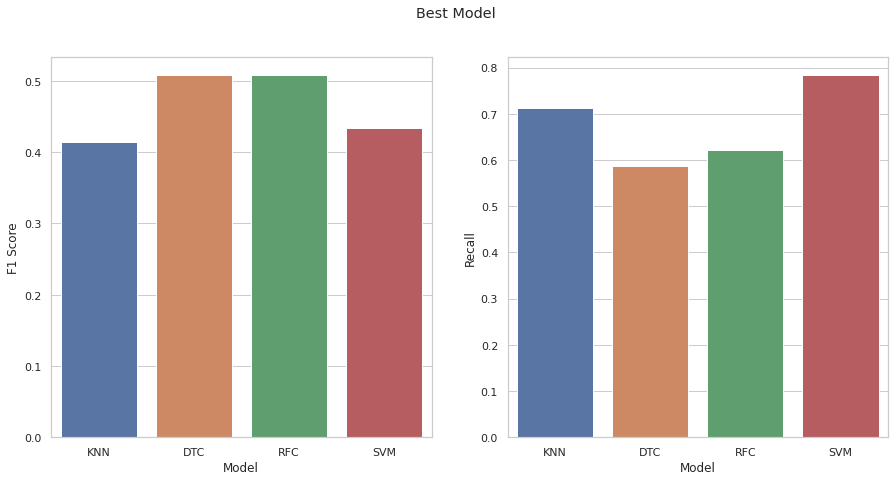

In [ ]:
plt.figure(figsize=(10,5))
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,7))
fig.suptitle('Best Model')

plt.subplot(121)
sns.barplot(data=best_results, x='Model', y='F1 Score')

plt.subplot(122)
sns.barplot(data=best_results, x='Model', y='Recall')

In [ ]:
r = best_results.sort_values('F1 Score', ascending=False)
best_model = r.iloc[[0]]
best_model

,Data Train,Best Score,Train accuracy,Test accuracy,Precision,Recall,F1 Score,Best Parameters,Model
2,SMOTE,0.799537,0.806879,0.752889,0.448518,0.586735,0.5084,"{'max_depth': 20, 'min_samples_split': 0.1}",DTC



Training Accuracy Score:  0.8068794413134036
Testing Accuracy Score:  0.7528888888888889
Precision on test data:  0.4485179407176287
Recall on test data:  0.5867346938775511
F1 score on test data:  0.5083996463306808

Classification Report on Train data
              precision    recall  f1-score   support

           0       0.81      0.81      0.81     16325
           1       0.81      0.81      0.81     16323

    accuracy                           0.81     32648
   macro avg       0.81      0.81      0.81     32648
weighted avg       0.81      0.81      0.81     32648


Classification Report on Test data
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      6436
           1       0.59      0.45      0.51      2564

    accuracy                           0.75      9000
   macro avg       0.69      0.66      0.67      9000
weighted avg       0.74      0.75      0.74      9000




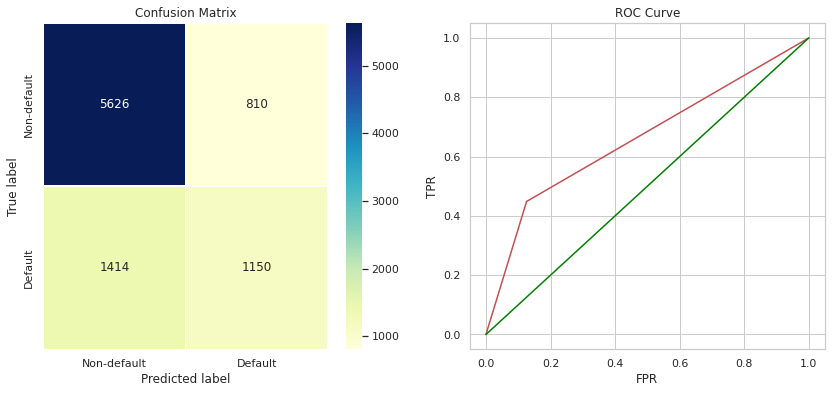

In [ ]:
best_model = DecisionTreeClassifier(max_depth = 20, min_samples_split = 0.1)
best_model = best_model.fit(X_SMOTE, y_SMOTE)
mat = test_report(best_model,X_SMOTE,y_SMOTE,X_test,y_test)

## Conclusion 

Our objective was to maximize the F1-score.

The best **F1-score** was obtained by Random Forest with 0,508 while the highest
**Recall** was achieved by Support Vector Machine with 0.784.

We can see how the best results have been obtained through the use of resampling. 
